# Capstone III Exploratory Data Analysis

In this section we 'manually' explore our data. What kind of relationships between independent and dependent variables can we find without the aid of sophisticated modeling? Exploring the data in this way can lead to a more focused approach when it comes to the modeling sections. By learning about our data, we also learn what we should do with our data.

In sections 2 and 3 we look at the columns over time, and the correlation of each column with the dependent variable. In section 4 we analyze the stationarity of the dependent variable.

## Section 1: Imports and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/train_cleaned.csv', parse_dates = ['date_time'], index_col = 'date_time')

In [3]:
df.head()

co2_dining_room  co2_room  relative_humidity_dining_room  \
date_time                                                                       
2012-03-13 11:45:00          216.560   221.920                        39.9125   
2012-03-13 12:00:00          219.947   220.363                        39.9267   
2012-03-13 12:15:00          219.403   218.933                        39.7720   
2012-03-13 12:30:00          218.613   217.045                        39.7760   
2012-03-13 12:45:00          217.714   216.080                        39.7757   

                     relative_humidity_room  lighting_dining_room  \
date_time                                                           
2012-03-13 11:45:00                 42.4150               81.6650   
2012-03-13 12:00:00                 42.2453               81.7413   
2012-03-13 12:15:00                 42.2267               81.4240   
2012-03-13 12:30:00                 42.0987               81.5013   
2012-03-13 12:45:00                 42.0686               81.4657   

                     lighting_room  rain  sun_dusk     wind  \
date_time                                                     
2012-03-13 11:45:00        113.520   0.0   623.360  1.42625   
2012-03-13 12:00:00        113.605   0.0   623.211  1.59200   
2012-03-13 12:15:00        113.600   0.0   622.656  1.89133   
2012-03-13 12:30:00        113.344   0.0   622.571  1.82800   
2012-03-13 12:45:00        113.034   0.0   622.400  2.36071   

                     sun_light_in_west_facade  sun_light_in_east_facade  \
date_time                                                                 
2012-03-13 11:45:00                   9690.24                  12604.20   
2012-03-13 12:00:00                  11022.00                  10787.20   
2012-03-13 12:15:00                  13960.50                   9669.63   
2012-03-13 12:30:00                  18511.20                   9648.13   
2012-03-13 12:45:00                  26349.00                   9208.32   

                     sun_light_in_south_facade  sun_irradiance  \
date_time                                                        
2012-03-13 11:45:00                    95436.8         758.880   
2012-03-13 12:00:00                    95436.8         762.069   
2012-03-13 12:15:00                    95398.6         766.251   
2012-03-13 12:30:00                    95360.3         766.037   
2012-03-13 12:45:00                    95354.9         762.743   

                     outdoor_relative_humidity  indoor_temperature_room  
date_time                                                                
2012-03-13 11:45:00                    48.3750                  17.8275  
2012-03-13 12:00:00                    47.8080                  18.1207  
2012-03-13 12:15:00                    47.4320                  18.4367  
2012-03-13 12:30:00                    47.0240                  18.7513  
2012-03-13 12:45:00                    45.4743                  19.0414

In [4]:
df.index

DatetimeIndex(['2012-03-13 11:45:00', '2012-03-13 12:00:00',
               '2012-03-13 12:15:00', '2012-03-13 12:30:00',
               '2012-03-13 12:45:00', '2012-03-13 13:00:00',
               '2012-03-13 13:15:00', '2012-03-13 13:30:00',
               '2012-03-13 13:45:00', '2012-03-13 14:00:00',
               ...
               '2012-04-11 04:15:00', '2012-04-11 04:30:00',
               '2012-04-11 04:45:00', '2012-04-11 05:00:00',
               '2012-04-11 05:15:00', '2012-04-11 05:30:00',
               '2012-04-11 05:45:00', '2012-04-11 06:00:00',
               '2012-04-11 06:15:00', '2012-04-11 06:30:00'],
              dtype='datetime64[ns]', name='date_time', length=2764, freq=None)

In [5]:
# Some stats models tools need the frequency explicated. pd.date_range(), rather than datetime, helps with that
df.index = pd.date_range(start = df.index[0], end = df.index[-1], freq='15min')

In [6]:
# Set indoor_temperature_room to an easier to type variable
y = df['indoor_temperature_room']

## Section 2: Column Values over Time

It may be helpful to see graphs of our columns over time, all in sequence.

### 2.1: Column Values over Time

In [7]:
df.columns

Index(['co2_dining_room', 'co2_room', 'relative_humidity_dining_room',
       'relative_humidity_room', 'lighting_dining_room', 'lighting_room',
       'rain', 'sun_dusk', 'wind', 'sun_light_in_west_facade',
       'sun_light_in_east_facade', 'sun_light_in_south_facade',
       'sun_irradiance', 'outdoor_relative_humidity',
       'indoor_temperature_room'],
      dtype='object')

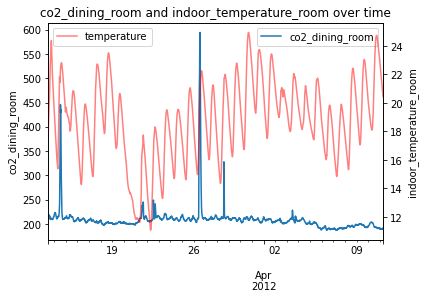

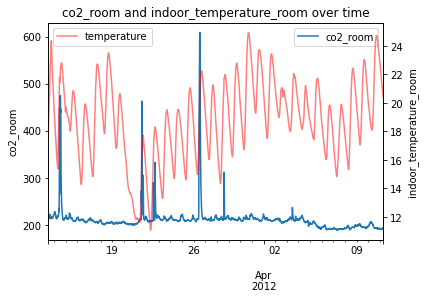

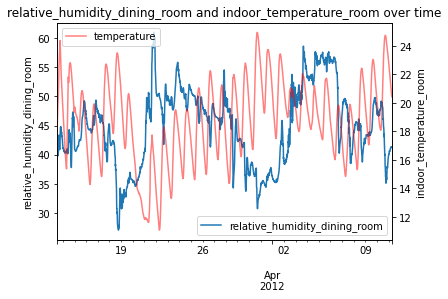

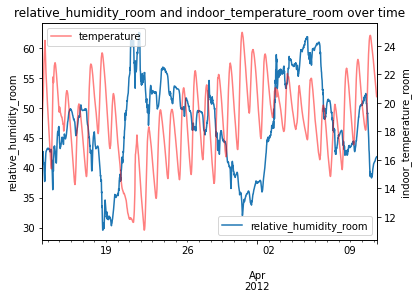

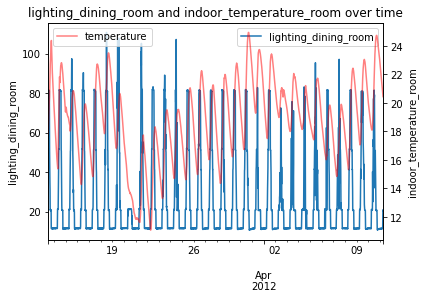

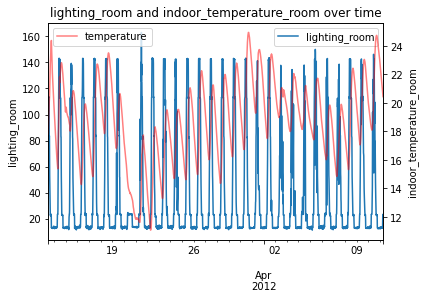

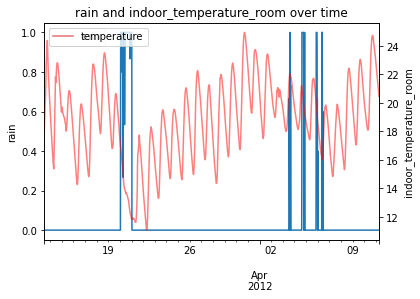

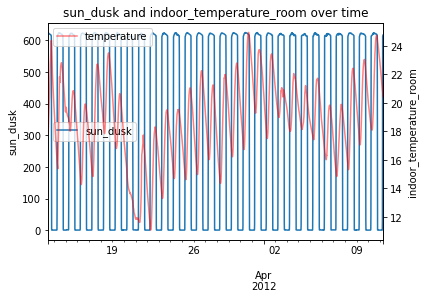

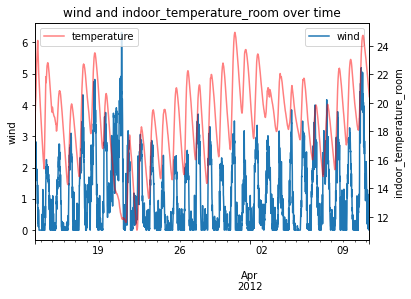

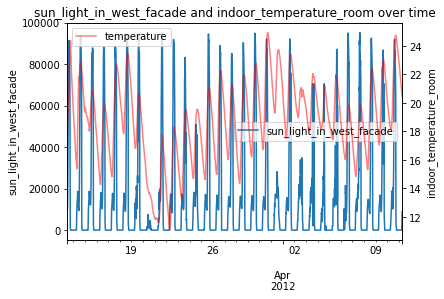

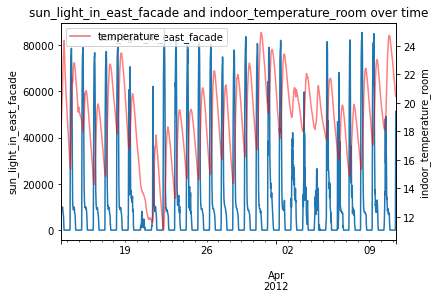

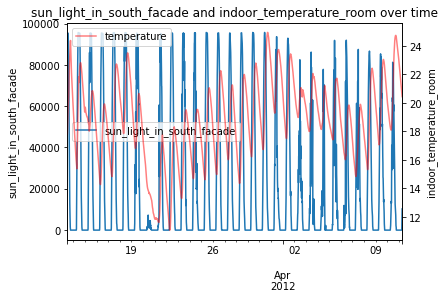

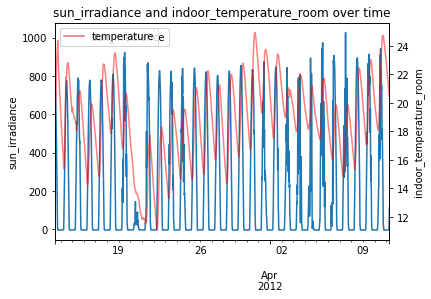

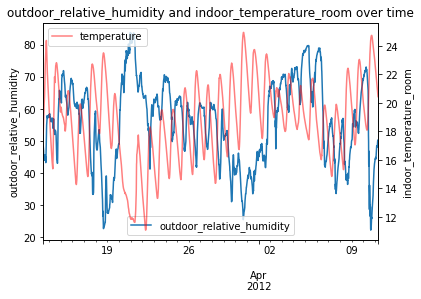

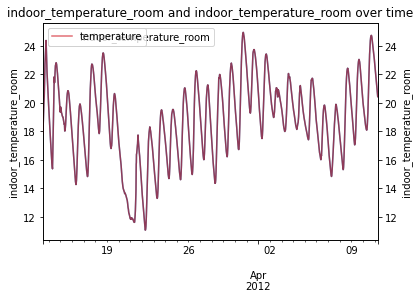

In [8]:
# Series of graphs of each column and room temperature on the same graph
no_graph = ['day_of_the_week'] # Not helpful to graph
for column in df.columns:
    if not column in no_graph: # Graph the other columns not in no_graph
        df[column].plot()
        plt.ylabel(column)
        plt.legend([column])
        ax2 = plt.twinx() # Create a second y axis
        y.plot(c='red', alpha=0.5) # Plot the room temperature data on this second y axis
        plt.title(column + ' ' + 'and indoor_temperature_room over time')
        ax2.set_ylabel('indoor_temperature_room')
        plt.legend(['temperature'])
        plt.show()

In [9]:
df.describe()

co2_dining_room     co2_room  relative_humidity_dining_room  \
count      2764.000000  2764.000000                    2764.000000   
mean        208.479123   211.065844                      44.878420   
std          27.032686    28.469144                       6.587440   
min         187.339000   188.907000                      27.084000   
25%         200.893250   202.682750                      40.351975   
50%         207.045500   209.408000                      45.434650   
75%         211.245500   213.218750                      49.352675   
max         594.389000   609.237000                      60.957300   

       relative_humidity_room  lighting_dining_room  lighting_room  \
count             2764.000000           2764.000000    2764.000000   
mean                47.321220             26.745381      40.732571   
std                  7.557795             23.298441      42.326087   
min                 29.594700             10.740000      11.328000   
25%                 42.531325             11.588700      13.265300   
50%                 47.534700             11.801300      17.690000   
75%                 52.685975             31.224000      52.057350   
max                 62.594700            110.693000     162.965000   

              rain     sun_dusk         wind  sun_light_in_west_facade  \
count  2764.000000  2764.000000  2764.000000               2764.000000   
mean      0.047033   325.369289     1.108531              14936.617682   
std       0.206705   305.062614     1.161283              25964.049455   
min       0.000000     0.606667     0.000000                  0.000000   
25%       0.000000     0.650000     0.094833                  0.000000   
50%       0.000000   611.797000     0.659000                  0.000000   
75%       0.000000   619.210750     1.971497              15088.000000   
max       1.000000   624.960000     6.321330              95278.400000   

       sun_light_in_east_facade  sun_light_in_south_facade  sun_irradiance  \
count               2764.000000                2764.000000     2764.000000   
mean               12248.000148               22047.525813      215.010017   
std                21758.550527               32709.387051      297.234046   
min                    0.000000                   0.000000       -4.164670   
25%                    0.000000                   0.000000       -3.381330   
50%                    0.000000                   0.000000        3.922000   
75%                11131.275000               38736.575000      435.434500   
max                85535.400000               95704.400000     1028.270000   

       outdoor_relative_humidity  indoor_temperature_room  
count                2764.000000              2764.000000  
mean                   55.981988                18.824852  
std                    13.019610                 2.821178  
min                    22.260700                11.076000  
25%                    46.430675                17.060350  
50%                    57.477350                19.021000  
75%                    65.649325                20.828700  
max                    83.805300                24.944000

Some interseting information immediately presents intself from these graphs and statistics. Before moving on, it is important to emphasize that these graphs are using the same x=axis (time) but *not* the same y-axis. The y-axis scales are different!

- **co2_dining_room**: We see two enormous spikes, one large spike, and a few other spikes in what is relatively mean stable distribution. The three spikes occur right around March 14, 26, and 29. These are outliers, and we may consider dropping them later.

- **co2_room**: Again we see a number of spikes. The co2 levels in the room appear to have spiked on the same days as the co2 levels in the dining room, and also right around March 21 and 22. Both co2 columns have similar means at the low 200s. Neither co2 column seems to have very much correlation with the room temperature, as will become more clear in section 3.

- **Humidity columns**: It seems to have rained (or perhaps there was a water leak) on March 21 and April 4, as there are increases in humidity starting on those days. These columns appear to have some negative correlation with room temperature, meaning as humidity increases temperature decreases, and vice versa. 

- **Lighting columns**: A pair of truly periodic columns, peaking and troughing daily as the sun rises and falls. March 20 seems to have gotten almost no light (about 20 lux), as there is a massive decrease in light from the usual day time lux. Perhaps the measurement devices failed that day or something interfered with their recording. Although, interestingly, room temperature takes a dive on those days as well.

- **Rain**: Confirming our earlier intuition, it rained on the night of March 20 and showered between April 4 and 5. The presence of rain seems to result in lower room temperature.

- **sun_dusk**: Still not sure what this column means. But it jumped between zero and ~600 daily in a very periodic fashion. Sun dusk hasn't suffered the same drop on March 20 that the lighting columns did. There doesn't seem to be any correlation with room temperature.

- **Wind**: Wind has pretty mean stable daily fluctuations with a particularly windy day on the evening of March 20 and day of April 10. The March 20 windy day saw a drop in room temperature.

- **Sunlight columns**: Lighting on the various facades of the house rise and fall daily, as we'd expect. The south facade got considerably more light on average than the east or west facades did. This house is in the northern hemisphere. Something may have gone wrong with the sensors for March 20, where the light on all three facades was far below average. On days where sunlight is low, room temperature falls as well.

- **Sun irradiance** seems covariant with the sunlight columns, complete with the global minimum on March 20.

- **outdoor_relative_humidity** readings are a little less clear as far as tracking when it was raining, but there are maxima on the days that it did rain (March 20 and April 4-5). It was more humid outdoors compared to indoors, as we would expect.

- **indoor_temperature_room**, the target variable, follows some expected behavior. It has periodic peaks and valleys with a difference of about 6 or 7 degrees celsius corresponding to day and night time. It reaches its minimum on March 21, the day after one of the heavy rain days. Then between March 21 and about April 4 we see an upward trend, followed by a slight downward trend from the rain, and then an upward trend again starting about April 7. If we were to make guesses on the forecasting of this temperature from eyeballing graphs alone we might say that the mean temperature is most affected by rainfall. Therefore, we might expect the mean temperature to fall again when the next rainfall occurs. 

And just before moving on it may serve to make things a little more clearer, visually, if we generate the same plots as above but downsampled to daily measurements instead of 15 minute periods.

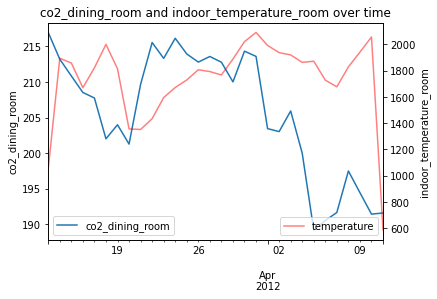

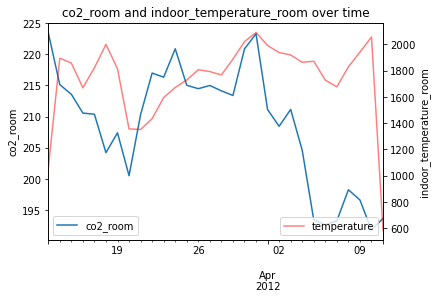

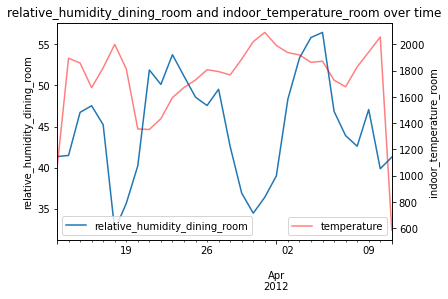

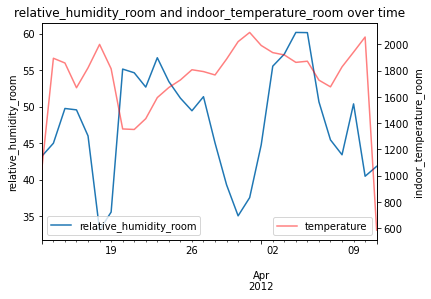

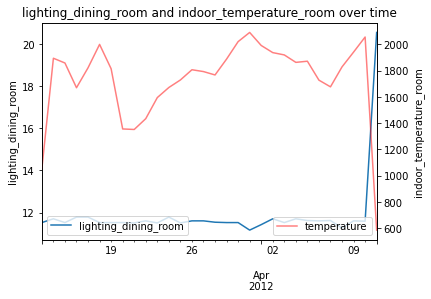

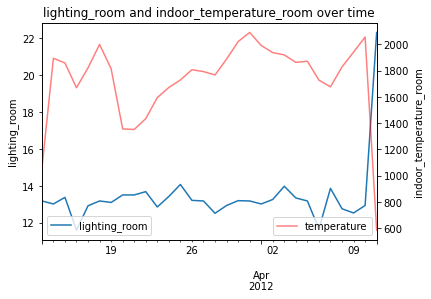

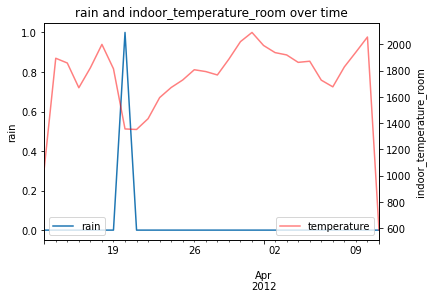

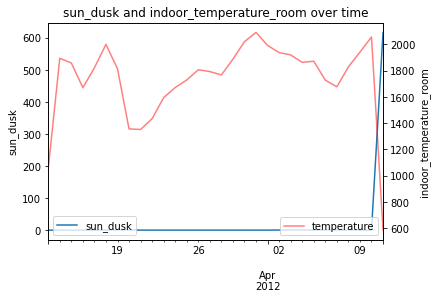

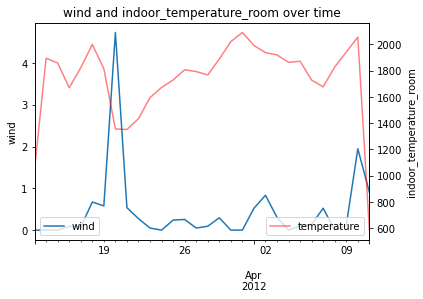

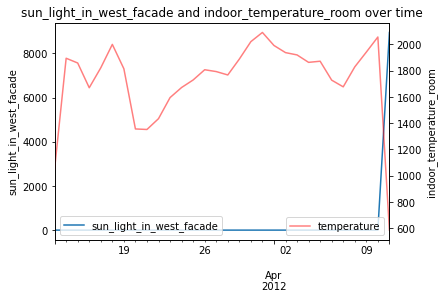

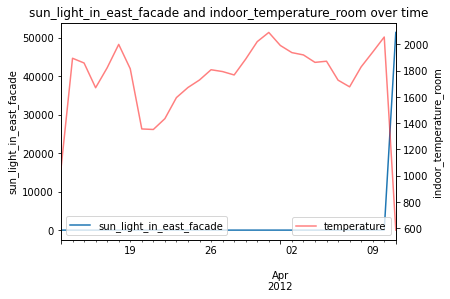

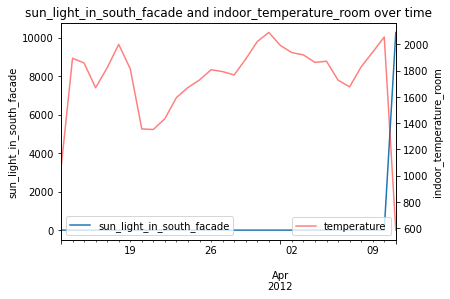

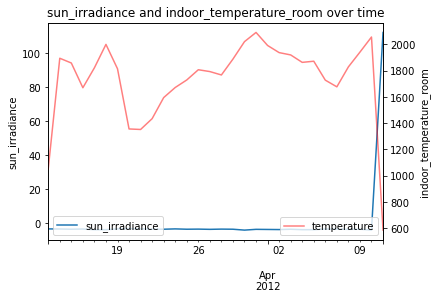

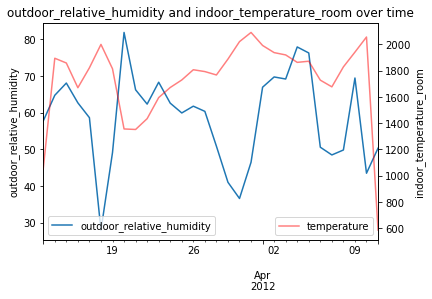

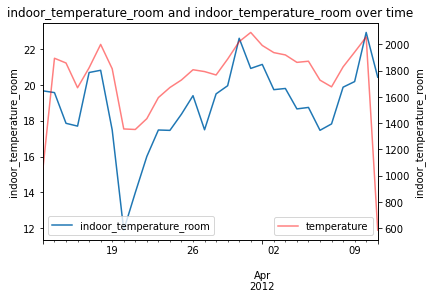

In [10]:
for column in df.columns:
    if not column in no_graph:
        df[column].resample('1D').last().plot()
        plt.ylabel(column)
        plt.legend([column], loc = 3)
        ax2 = plt.twinx() # Create a second y axis
        y.resample('1D').sum().plot(c='red', alpha=0.5)
        plt.title(column + ' ' + 'and indoor_temperature_room over time')
        ax2.set_ylabel('indoor_temperature_room')
        plt.legend(['temperature'], loc = 4)
        plt.show()

### 2.2 Percent Change over Time

Viewing the percent change of each column with the percent change of our target variable may also be helpful for understanding their relationships. Seeing simple correlations can sometimes lead us to make spurious connections: for example the Dow Jones Industrial average stock price increases as UFO sightings increase, and of course there is no relationship between the two. Viewing the correlation between the percent changes, rather than absolute increases and decreases in column values, can help us be more sure about correlations. 

The first three cells demonstrate that computing the percent change of the rain variable results in strange results. Rain in this data set is (mostly) categorical, although there are values between zero and one. We might think the percent change between two non rainy days, i.e. zero and zero, is zero. Python produces a NaN for these instances. We'll leave it out of this section.

In [11]:
df['rain'].unique()

array([0.       , 0.8      , 1.       , 0.933333 , 0.266667 , 0.533333 ,
       0.733333 , 0.866667 , 0.0666667, 0.666667 , 0.4      , 0.333333 ,
       0.133333 , 0.6      , 0.466667 ])

In [12]:
df['rain'].pct_change().unique()

array([        nan,         inf,  0.25      ,  0.        , -0.066667  ,
       -0.14285684, -0.733333  ,  2.74999531, -0.466667  ,  0.37500023,
        0.36363698, -0.133333  ,  0.15384571, -1.        ,  9.        ,
       -0.4000003 ,  2.000003  , -0.333333  , -0.81818219,  0.87500117,
       -0.866667  , -0.42857158,  0.25000141, -0.4       ,  0.66666667,
        0.28571337])

In [13]:
df_dummy = pd.DataFrame({'rain':[0,0,0,1,1,0]})
df_dummy['rain_pct_change_test'] = df_dummy.rain.pct_change(fill_method='ffill')
df_dummy

rain  rain_pct_change_test
0     0                   NaN
1     0                   NaN
2     0                   NaN
3     1                   inf
4     1                   0.0
5     0                  -1.0

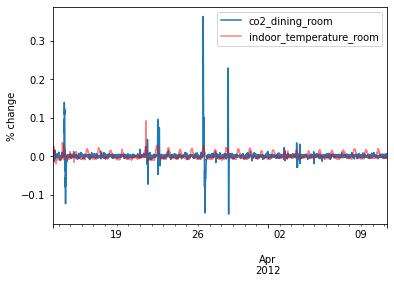

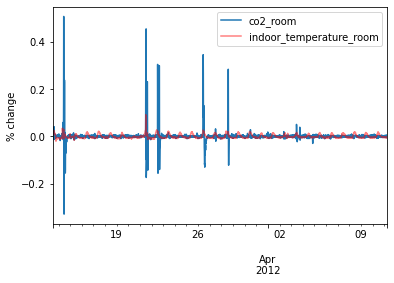

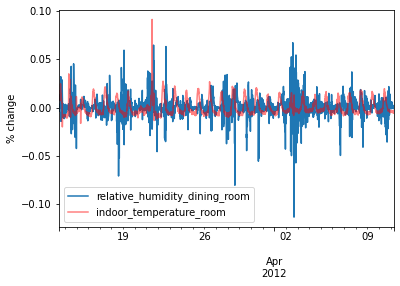

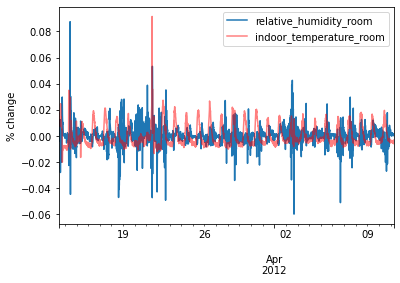

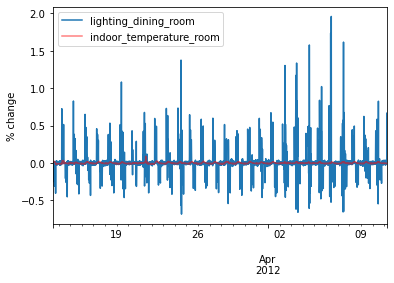

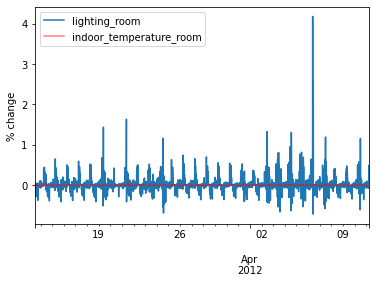

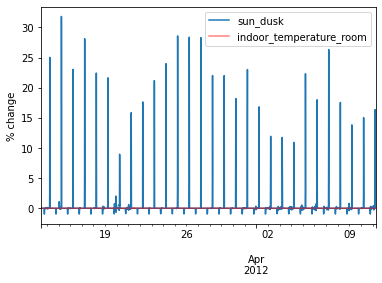

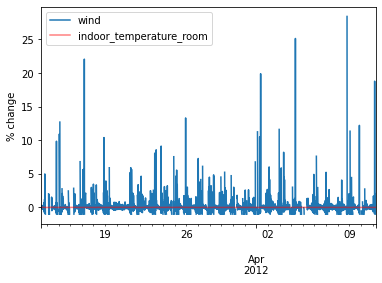

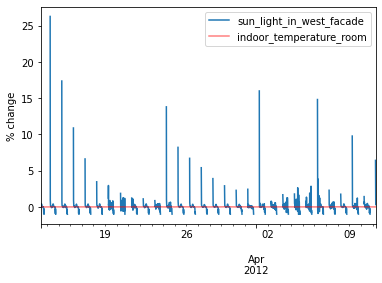

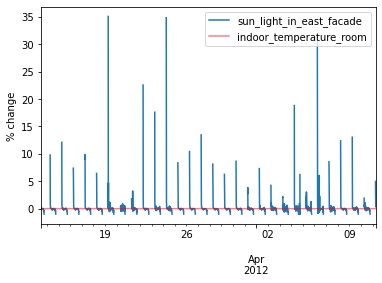

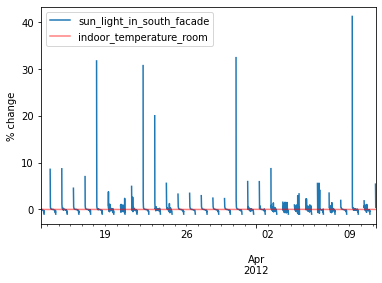

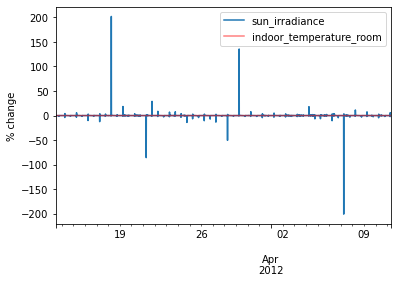

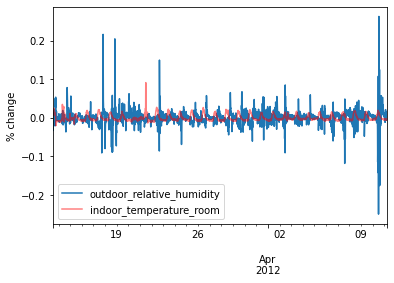

In [14]:
# The rain column is rather more categorical than the others, and will result in NaN values for pct change. Exclude it.
no_graph_pct_change = no_graph.copy() + ['rain', 'indoor_temperature_room'] # Also don't need to graph indoor_temperature_room
for column in df.columns:
    if not column in no_graph_pct_change: # Graph the other columns
        change = df[column].pct_change()
        change.plot(label = column)
        y.pct_change().plot(c='red', alpha=0.5, label = 'indoor_temperature_room')
        plt.ylabel('% change')
        plt.legend()
        plt.show()

In [15]:
statistics_columns = df.columns.drop(['rain'])
df[statistics_columns].pct_change().describe()

co2_dining_room     co2_room  relative_humidity_dining_room  \
count      2763.000000  2763.000000                    2763.000000   
mean          0.000065     0.000275                       0.000070   
std           0.015236     0.026676                       0.010767   
min          -0.150820    -0.328203                      -0.113691   
25%          -0.002134    -0.002428                      -0.003351   
50%          -0.000053    -0.000256                       0.000221   
75%           0.001862     0.001992                       0.003905   
max           0.362564     0.506876                       0.067288   

       relative_humidity_room  lighting_dining_room  lighting_room  \
count             2763.000000           2763.000000    2763.000000   
mean                 0.000022              0.011172       0.012656   
std                  0.007380              0.163513       0.186012   
min                 -0.059768             -0.682641      -0.715731   
25%                 -0.002661             -0.012878      -0.035572   
50%                  0.000171              0.000000      -0.000089   
75%                  0.002763              0.013999       0.030287   
max                  0.087416              1.960604       4.178807   

          sun_dusk         wind  sun_light_in_west_facade  \
count  2763.000000  2460.000000               1398.000000   
mean      0.300483          inf                       inf   
std       2.347639          NaN                       NaN   
min      -0.974020    -1.000000                 -1.000000   
25%      -0.000548    -0.250637                 -0.071287   
50%       0.000000    -0.013671                  0.013645   
75%       0.000413     0.333362                  0.183065   
max      31.824657          inf                       inf   

       sun_light_in_east_facade  sun_light_in_south_facade  sun_irradiance  \
count               1406.000000                1394.000000     2763.000000   
mean                        inf                        inf            -inf   
std                         NaN                        NaN             NaN   
min                   -1.000000                  -1.000000            -inf   
25%                   -0.151375                  -0.171224       -0.054789   
50%                   -0.029548                  -0.009772        0.000000   
75%                    0.053638                   0.137520        0.047117   
max                         inf                        inf      202.020512   

       outdoor_relative_humidity  indoor_temperature_room  
count                2763.000000              2763.000000  
mean                    0.000212                 0.000081  
std                     0.019853                 0.008015  
min                    -0.249657                -0.020053  
25%                    -0.006901                -0.005347  
50%                     0.000362                -0.003114  
75%                     0.007111                 0.003948  
max                     0.263016                 0.091444

Since we're looking at percent changes rather than absolute differences, it is appropriate to graph each column with temperature on the same set of axes. It is perhaps easier to remark about the correlation between each column and the room temperature over time when viewing these graphs.

- **co2 columns**: As before, the changes in the CO2 variables and the room temperature variable don't seem to have much to do with each other. CO2 is much more stable outside of a few large spikes. At the co2 spikes temperature also has a greater than usual positive percent change, but nowhere even close to CO2's except on March 21 where temperature also spiked. The largest madnitude percent change in the co2 columns is only about 0.51%. Room temperature has greater normal variance than the CO2 columns. CO2's outliers are quite vivid in the graphs and in the summary statistics table. 

- **Humidity columns**: The humidity columns are quite stable, with no percent change greater in magnitude than ~0.11%. There are also extreme outliers in these columns, and extreme spikes occur in these columns more often than in the room temperature column. There appears to be some correlation, though it may be weak. 

- **Lighting columns**: The lighting columns have a high daily variance in percent change. They're relativey unstable, which is to be expected as light varies quite a bit from day time to night time. Lighting in the room differs by as much as 4% between readings.

- **sun_dusk**: Sun dusk is highly unstable with huge cyclical swings in percent change. Sun dusk changes by as much as 31% between readings.

- **Wind**: Wind has a number of spikes in percent change, about 6, and in the low 20% range. It regularly has lesser spikes of about 5 to 10%. There is what seems to be daily periods of inactivity where groups of measurements see maybe a percent or two change. It appears the .diff() method did not cleanly calculate all the differences for these values, as the summary statistics show NaN's and inf values.

- **Sunlight columns**: The sunlight columns seem to have about 6 or so spikes in percent change each getting in to the 20-30% range. This is odd, and not immediately visible from the standard line plots we did earlier. It appears the .diff() method did not cleanly calculate all the differences for these values, as the summary statistics show NaN's and inf values. 

- **Sun irradiance** This column has about 5 spikes in percent change. It appears the .diff() method did not cleanly calculate all the differences for these values, as the summary statistics show NaN's and inf values. 

- **outdoor_relative_humidity** Percent changes are pretty stable with the exceptions being on the two instances of rain (March 20 and April 4-5). The greatest percent change was ~26%.

## Section 3: Column Distributions

### 3.1 Column Correlation with Room Temperature

Here we look at scatter plots of each column against our target variable, indoor_temperature_room.

[]

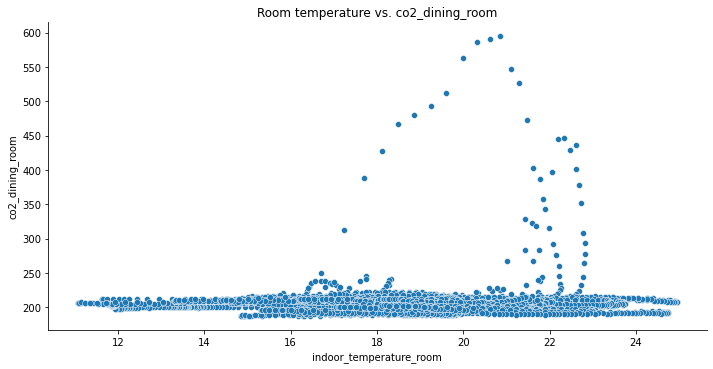

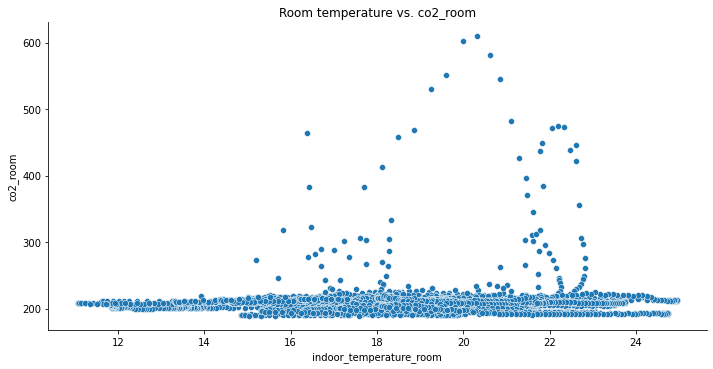

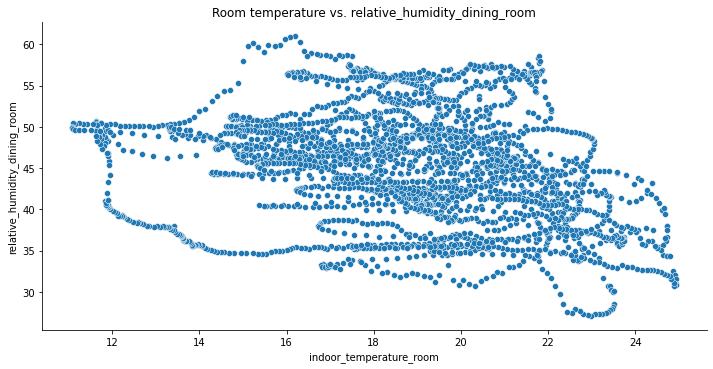

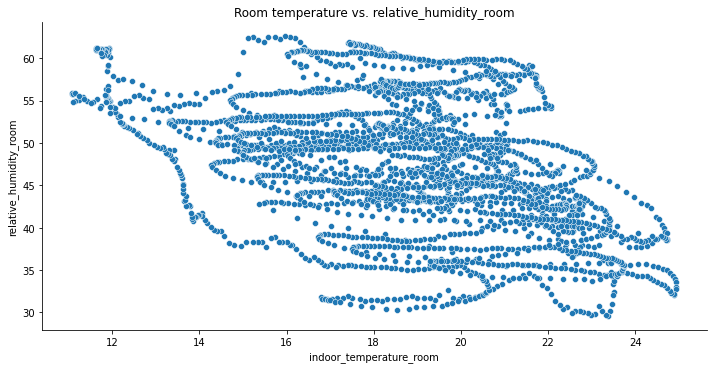

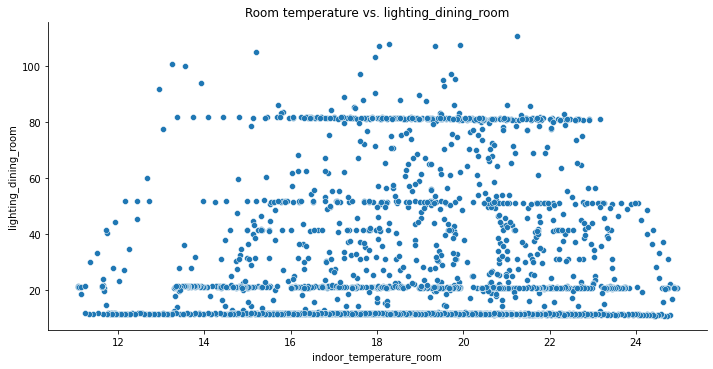

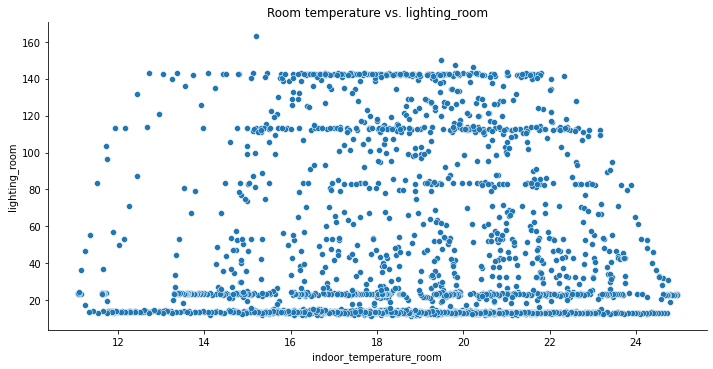

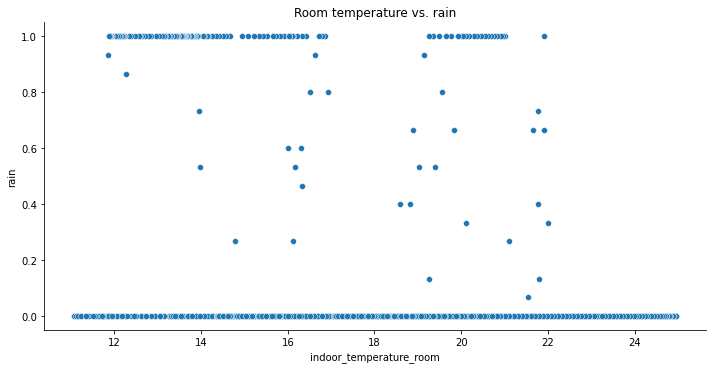

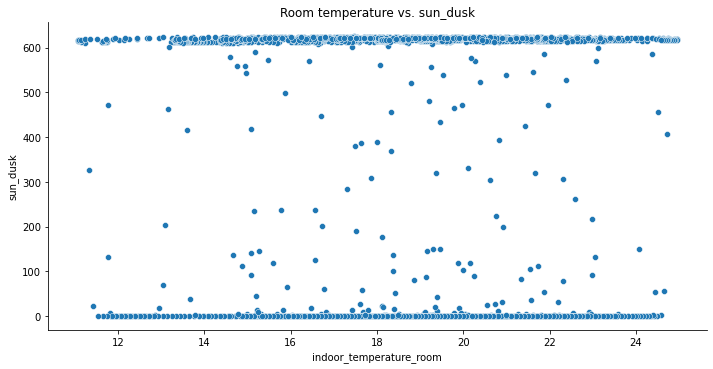

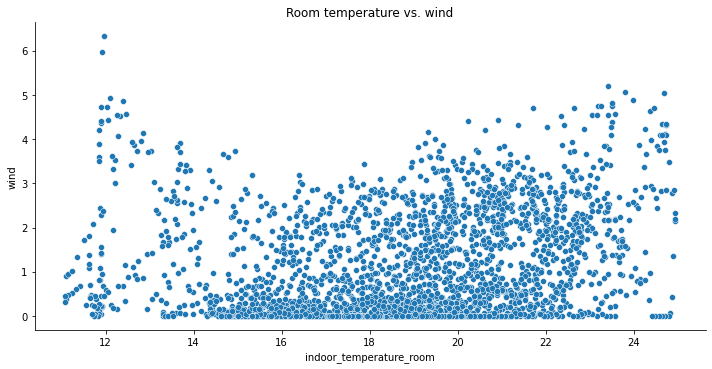

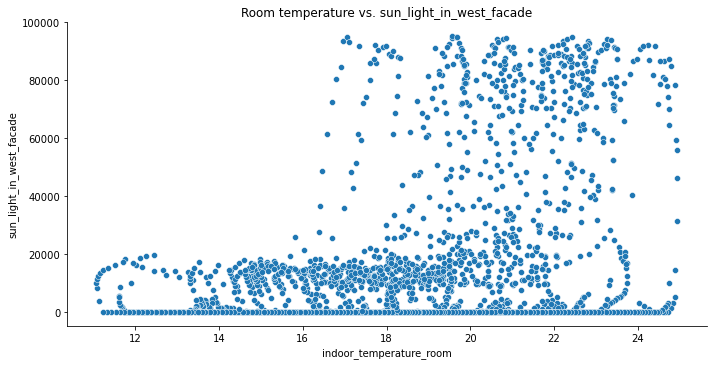

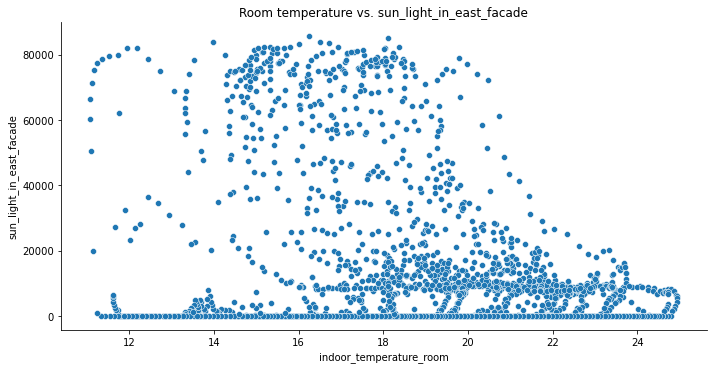

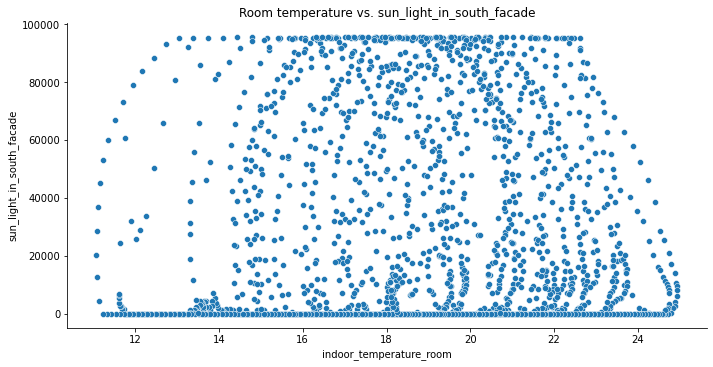

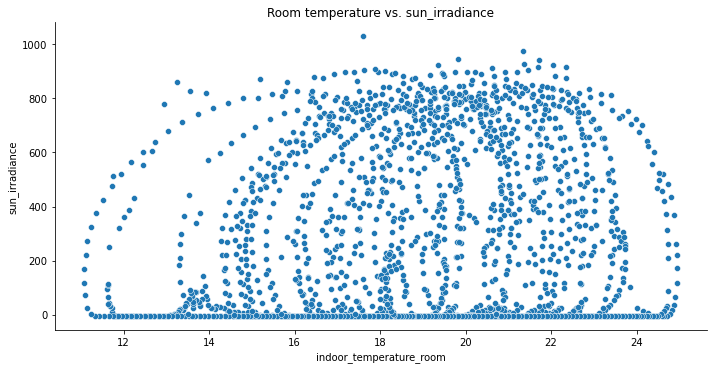

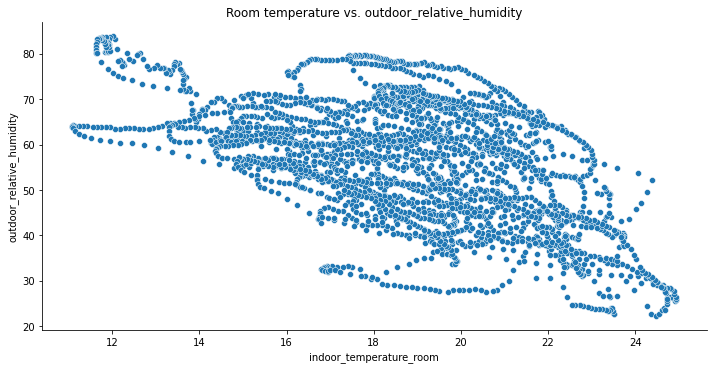

In [16]:
no_graph_scatter = no_graph.copy() + ['indoor_temperature_room']
for column in df.columns:
    if not column in no_graph_scatter:
        change = df[column].pct_change()
        sns.relplot(data = df, x = 'indoor_temperature_room', y = column, kind = 'scatter',
           height = 5, aspect = 2)
        plt.title('Room temperature vs.' + ' ' + column)
plt.plot()

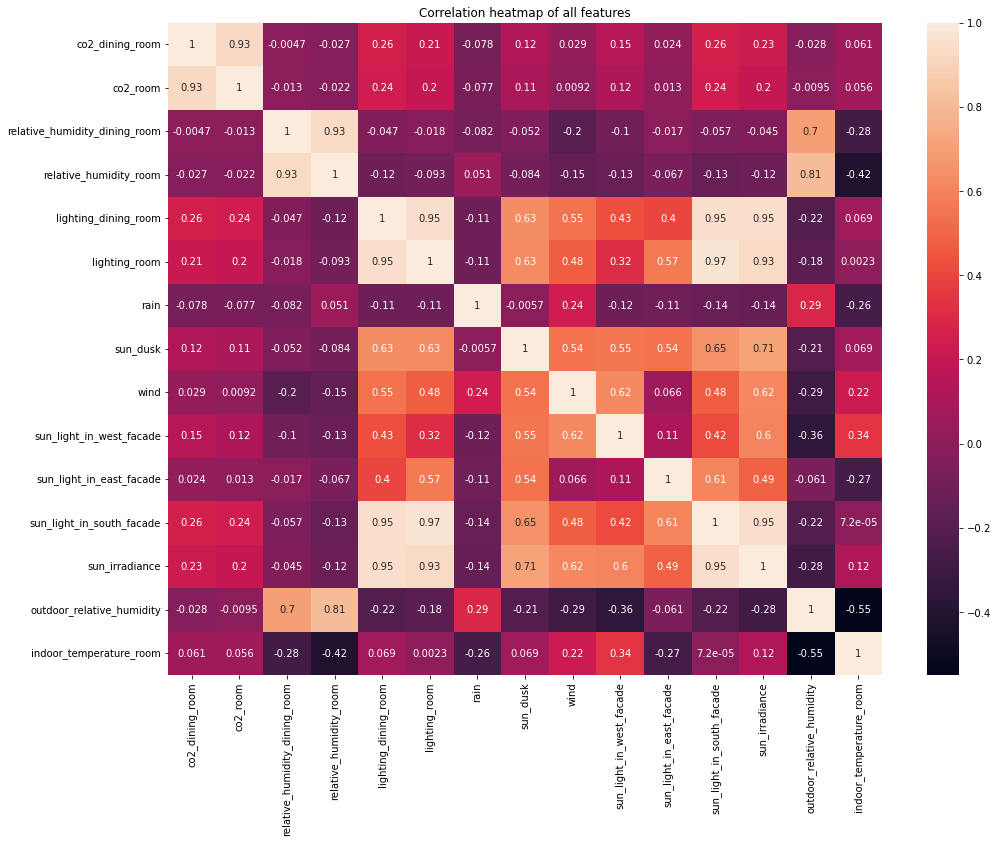

In [17]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation heatmap of all features')
plt.show()

Nothing correlates very strongly with room temperature, positively or negatively. In the series of graphs above there isn't much of a linear relationship between any variable and room temperature. The closest to a linear relationship we can see is outdoor_relative_humidity and temperature having a negative correlation. 

- Positive correlations: From the heatmap of correlations we see that, weakly, room temperature increases as wind increases (0.22 pearson correlation coefficient). We also see that room temperature increase, a little more strongly, as sunlight in the west facade increases (0.34).

- Negative correlations: from the heatmap of correlations we see that as outdoor_relative_humidity (-0.55), relative_humidity_room (-0.42), relative_humidity_dining_room (-0.28), sunlight_in_east_facade (-0.27) and rain (-0.26) increase, room temperature decreases. 

- The rest of the columns have very little correlation with room temperature.

### 3.2 Column Percent Change with Room Temperature Percent Change Correlation

In [18]:
# This is just to get a list of the correct columns to call pct_change() on
pct_change_columns = list(set(df.columns) - set(no_graph.copy()))
pct_change_columns = sorted(pct_change_columns)
pct_change_columns

['co2_dining_room',
 'co2_room',
 'indoor_temperature_room',
 'lighting_dining_room',
 'lighting_room',
 'outdoor_relative_humidity',
 'rain',
 'relative_humidity_dining_room',
 'relative_humidity_room',
 'sun_dusk',
 'sun_irradiance',
 'sun_light_in_east_facade',
 'sun_light_in_south_facade',
 'sun_light_in_west_facade',
 'wind']

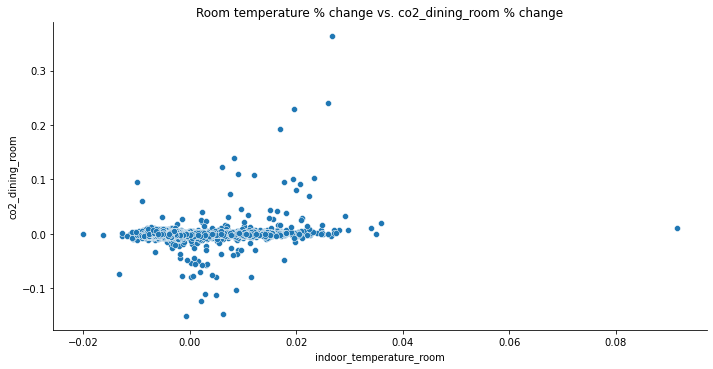

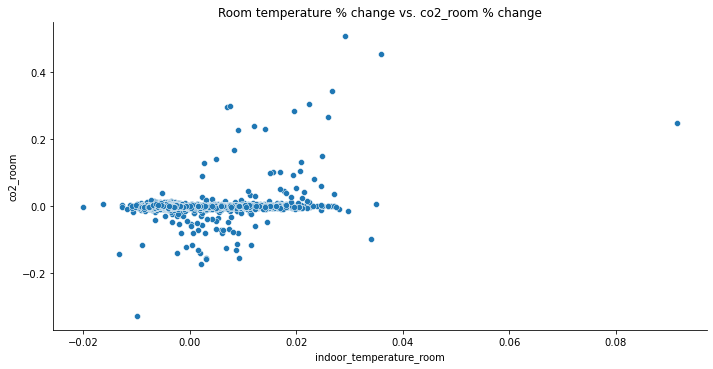

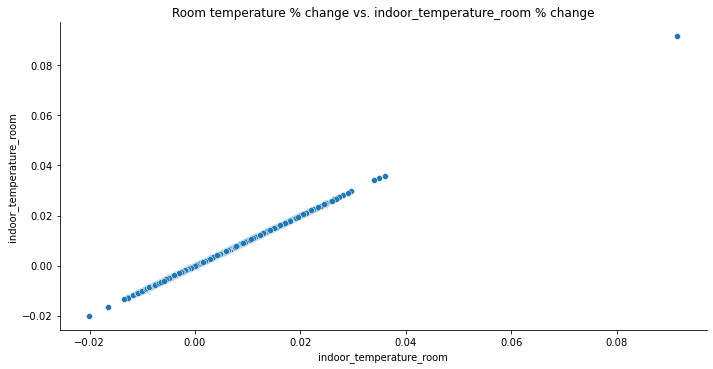

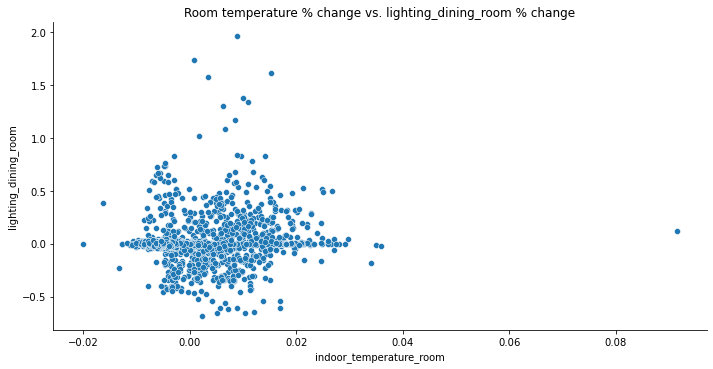

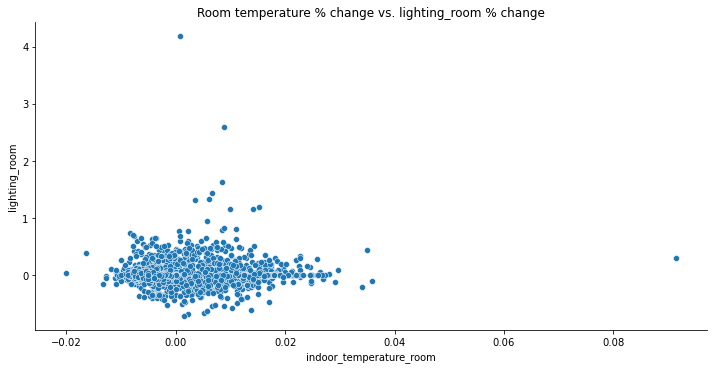

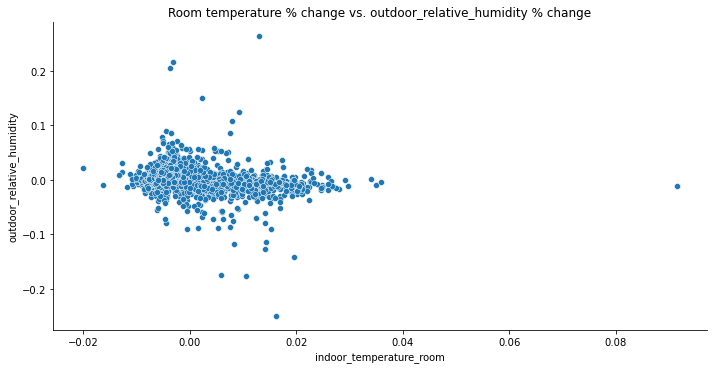

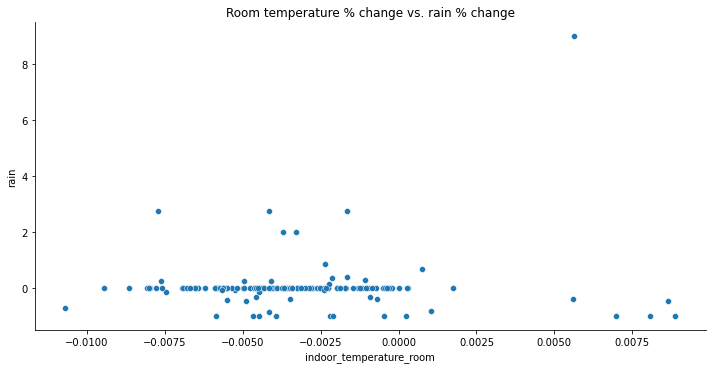

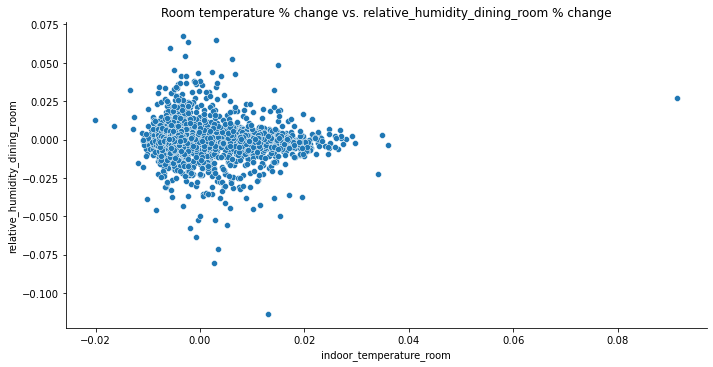

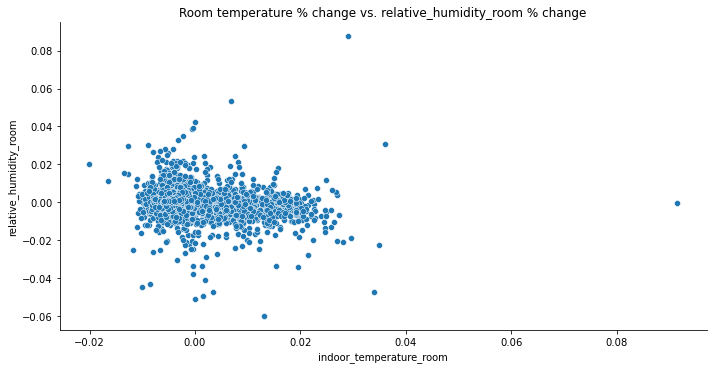

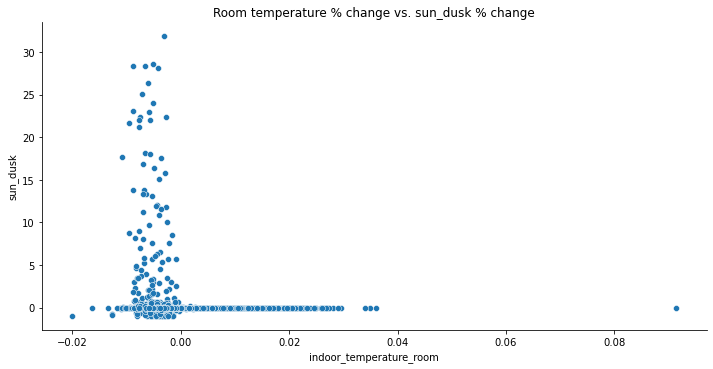

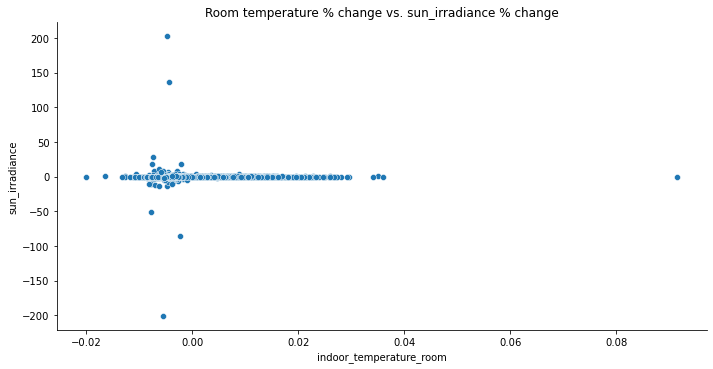

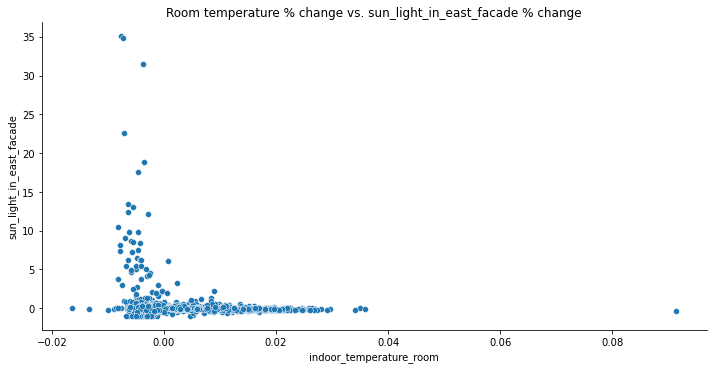

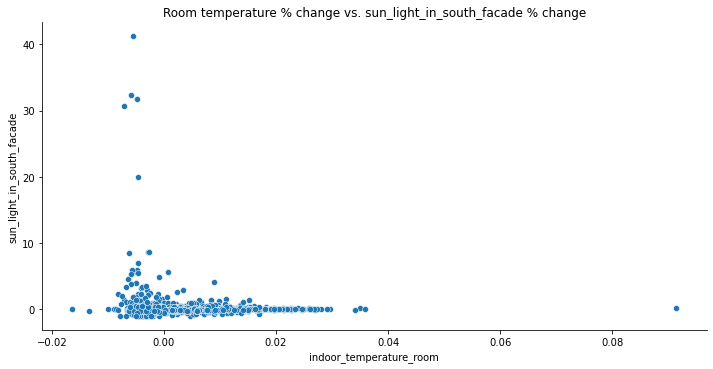

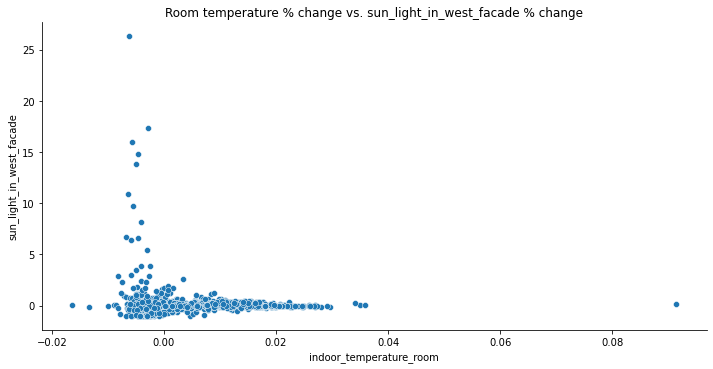

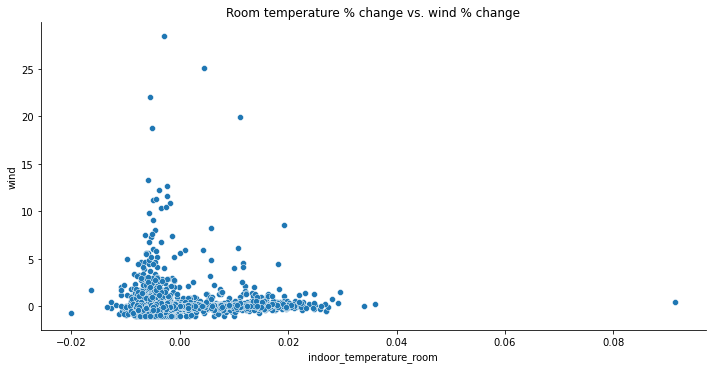

In [19]:
# And another series of scatter plots comparing percent changes instead of absolute changes
for column in df[pct_change_columns]:
    sns.relplot(data = df[pct_change_columns].pct_change(), x = 'indoor_temperature_room', y = column,
                kind = 'scatter', height = 5, aspect = 2)
    plt.title('Room temperature % change vs.' + ' ' + column + ' ' + '% change')
plt.show()

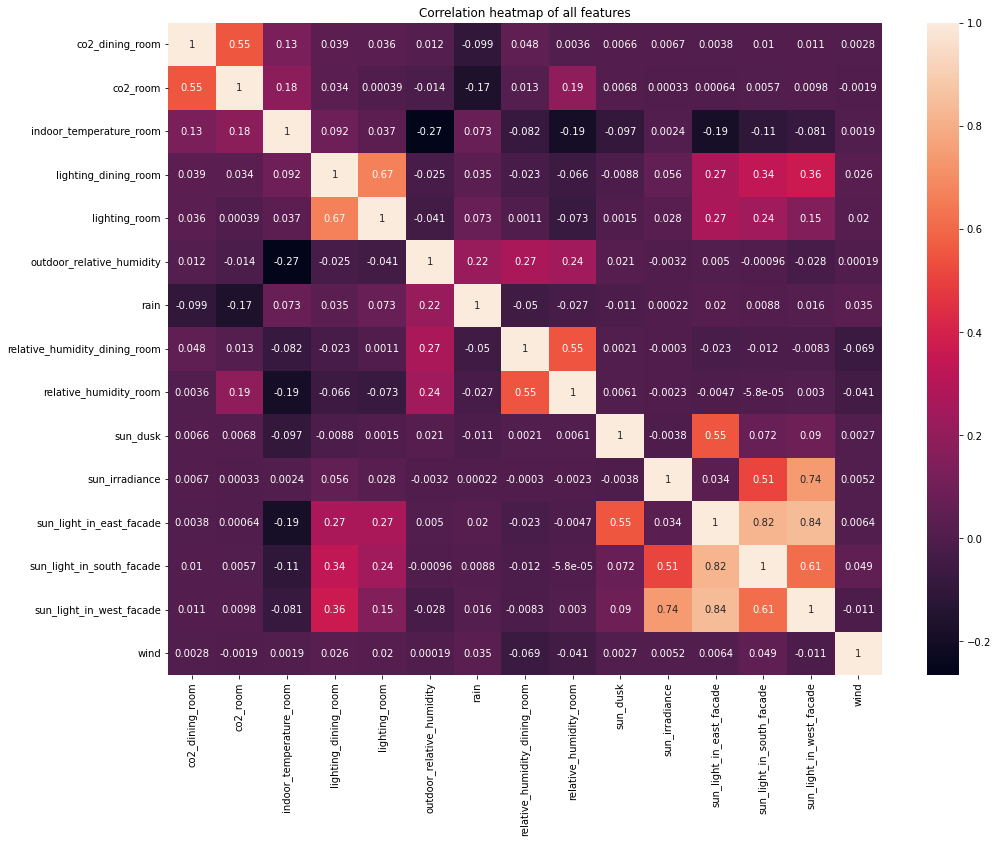

In [20]:
plt.figure(figsize = (16,12))
sns.heatmap(df[pct_change_columns].pct_change().corr(), annot = True)
plt.title('Correlation heatmap of all features')
plt.show()

The correlation heatmap of percent changes paint a different picture. The percent change for indoor_temperature_room has practically no correlation with anything. It's highest positive correlation coefficient is 0.18 and 0.13 for co2_room and co2_dining_room, respectively. Its lowest negative correlation is -0.27 and -0.19 for outdoor_relative_humidity and sun_light_in_east_facade, respectively.

In summary, then, ordinary least squares regression is not an appropriate model for the relationship between the features and the dependent variable. 

### 3.3 Simple Column Distributions

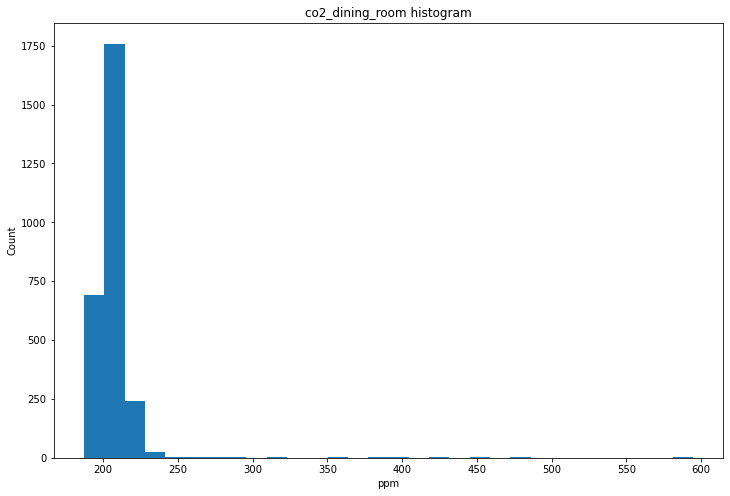

In [21]:
# This column has outliers that may need dropping
fig = plt.figure(figsize=(12, 8))
plt.hist(df['co2_dining_room'], bins = 30)
plt.ylabel('Count')
plt.xlabel('ppm')
plt.title('co2_dining_room histogram')
plt.show()

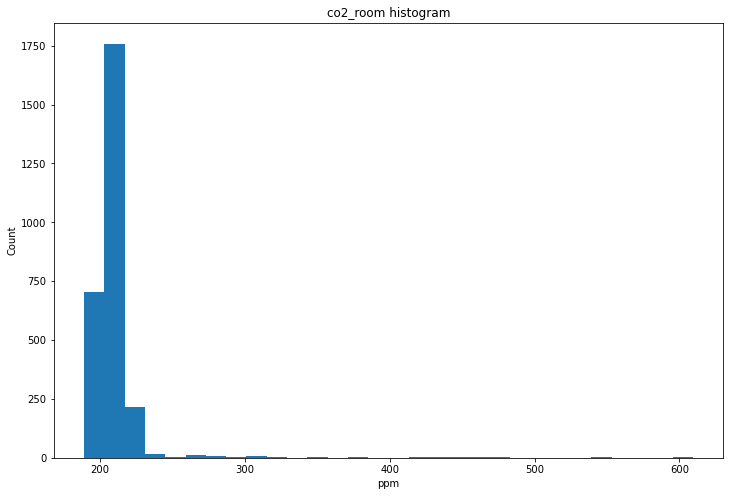

In [22]:
# This column has outliers that may need dropping
fig = plt.figure(figsize=(12, 8))
plt.hist(df['co2_room'], bins = 30)
plt.ylabel('Count')
plt.xlabel('ppm')
plt.title('co2_room histogram')
plt.show()

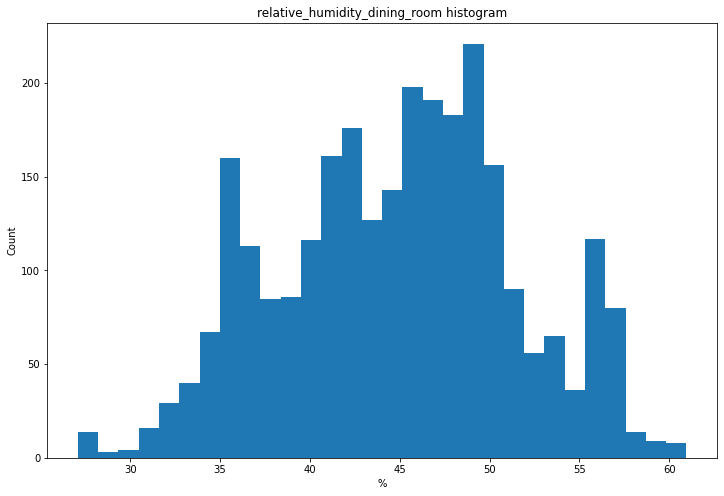

In [23]:
# This column looks okay
fig = plt.figure(figsize=(12, 8))
plt.hist(df['relative_humidity_dining_room'], bins = 30)
plt.ylabel('Count')
plt.xlabel('%')
plt.title('relative_humidity_dining_room histogram')
plt.show()

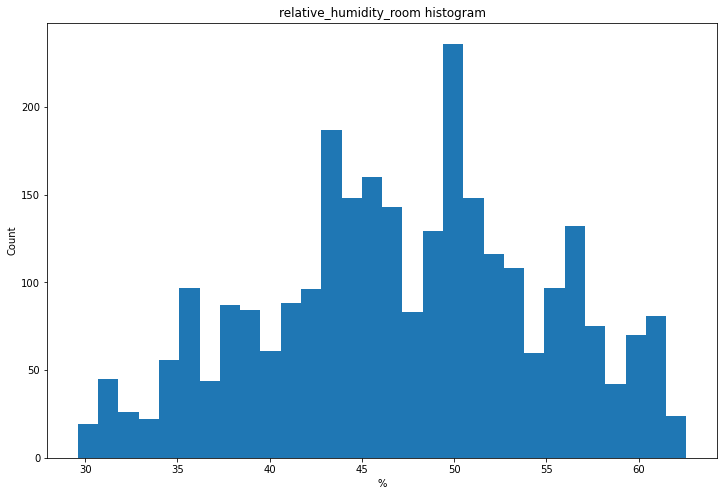

In [24]:
# This column looks okay
fig = plt.figure(figsize=(12, 8))
plt.hist(df['relative_humidity_room'], bins = 30)
plt.ylabel('Count')
plt.xlabel('%')
plt.title('relative_humidity_room histogram')
plt.show()

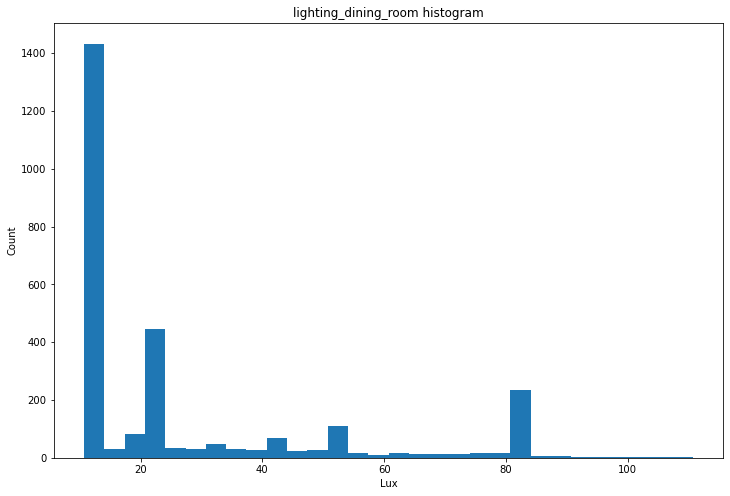

In [25]:
# This column is a little lopsided and trimodally distributed
fig = plt.figure(figsize=(12, 8))
plt.hist(df['lighting_dining_room'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Lux')
plt.title('lighting_dining_room histogram')
plt.show()

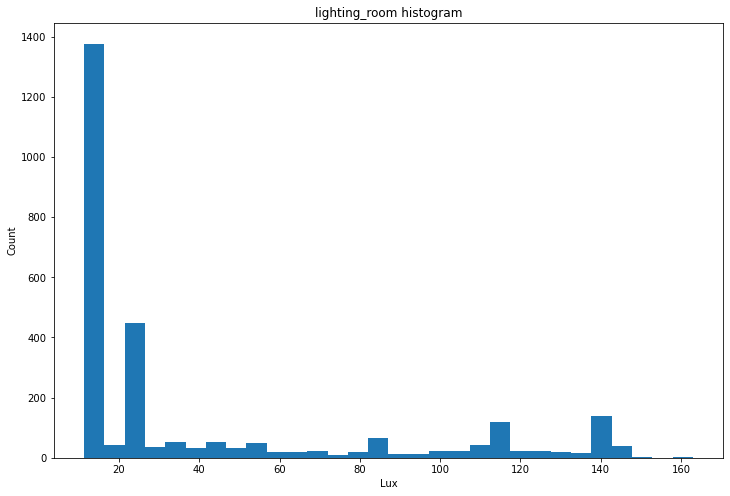

In [26]:
# This column is a little lopsided
fig = plt.figure(figsize=(12, 8))
plt.hist(df['lighting_room'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Lux')
plt.title('lighting_room histogram')
plt.show()

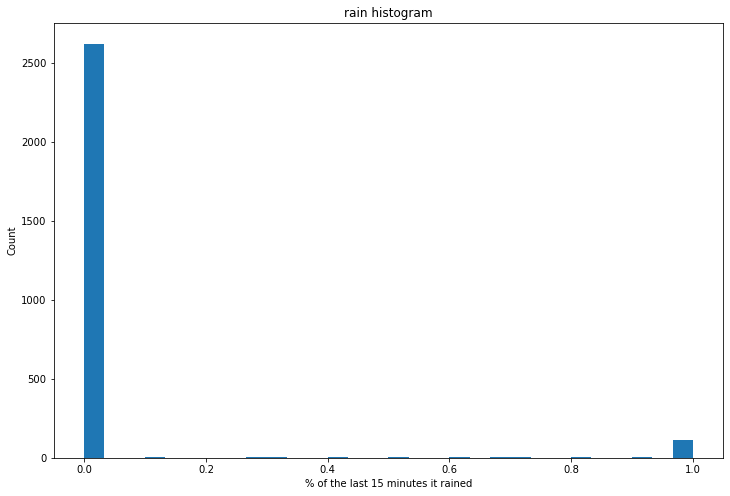

In [27]:
# This practically categorical with how few data points exist between raining and not raining
fig = plt.figure(figsize=(12, 8))
plt.hist(df['rain'], bins = 30)
plt.ylabel('Count')
plt.xlabel('% of the last 15 minutes it rained')
plt.title('rain histogram')
plt.show()

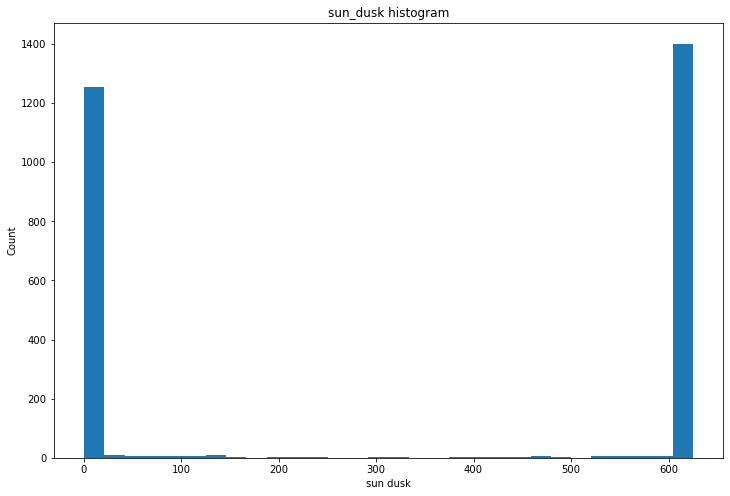

In [28]:
# This practically categorical with how few data points exist between low values and high values
fig = plt.figure(figsize=(12, 8))
plt.hist(df['sun_dusk'], bins = 30)
plt.ylabel('Count')
plt.xlabel('sun dusk')
plt.title('sun_dusk histogram')
plt.show()

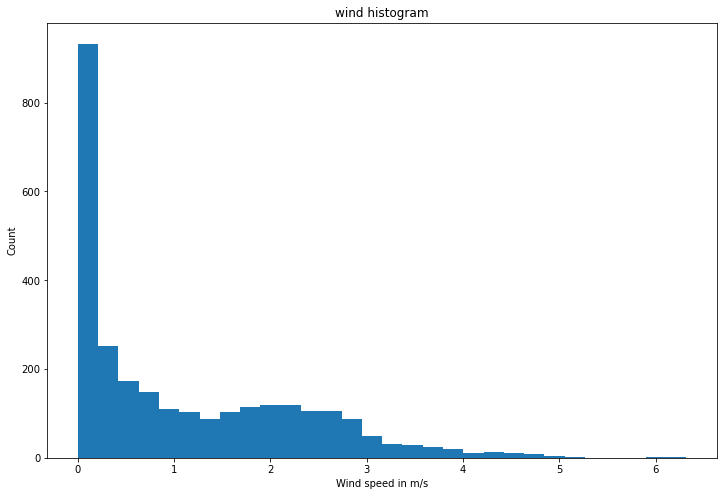

In [29]:
# Right skewed
fig = plt.figure(figsize=(12, 8))
plt.hist(df['wind'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Wind speed in m/s')
plt.title('wind histogram')
plt.show()

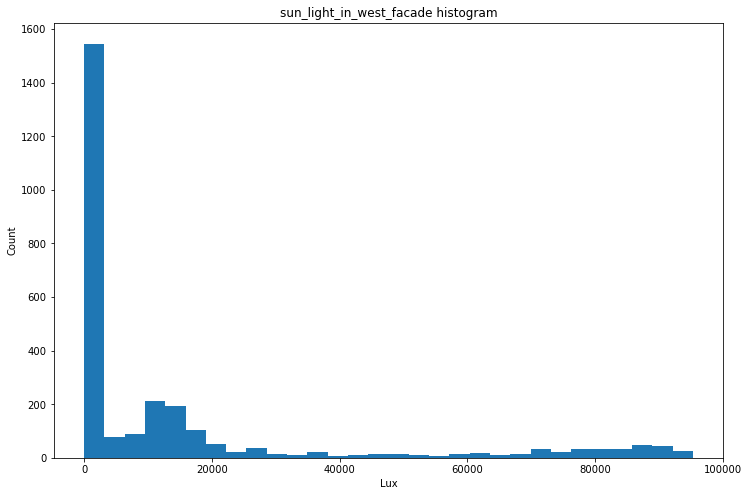

In [30]:
# Right skewed
fig = plt.figure(figsize=(12, 8))
plt.hist(df['sun_light_in_west_facade'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Lux')
plt.title('sun_light_in_west_facade histogram')
plt.show()

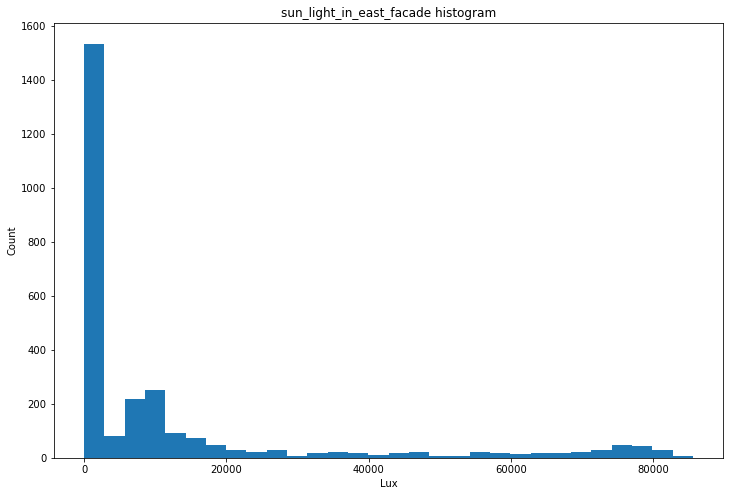

In [31]:
# Right skewed
fig = plt.figure(figsize=(12, 8))
plt.hist(df['sun_light_in_east_facade'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Lux')
plt.title('sun_light_in_east_facade histogram')
plt.show()

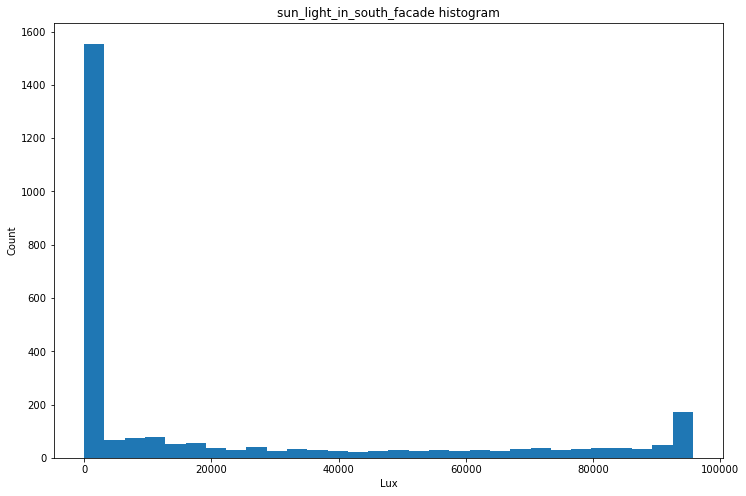

In [32]:
# Right skewed
fig = plt.figure(figsize=(12, 8))
plt.hist(df['sun_light_in_south_facade'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Lux')
plt.title('sun_light_in_south_facade histogram')
plt.show()

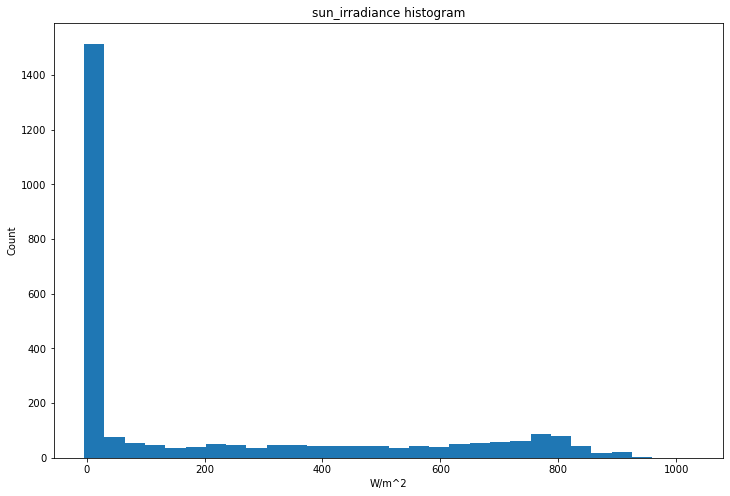

In [33]:
# Right skewed
fig = plt.figure(figsize=(12, 8))
plt.hist(df['sun_irradiance'], bins = 30)
plt.ylabel('Count')
plt.xlabel('W/m^2')
plt.title('sun_irradiance histogram')
plt.show()

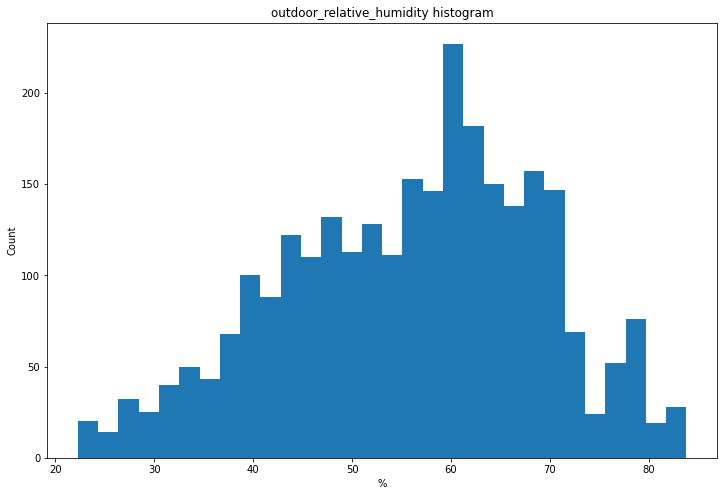

In [34]:
# Looks good
fig = plt.figure(figsize=(12, 8))
plt.hist(df['outdoor_relative_humidity'], bins = 30)
plt.ylabel('Count')
plt.xlabel('%')
plt.title('outdoor_relative_humidity histogram')
plt.show()

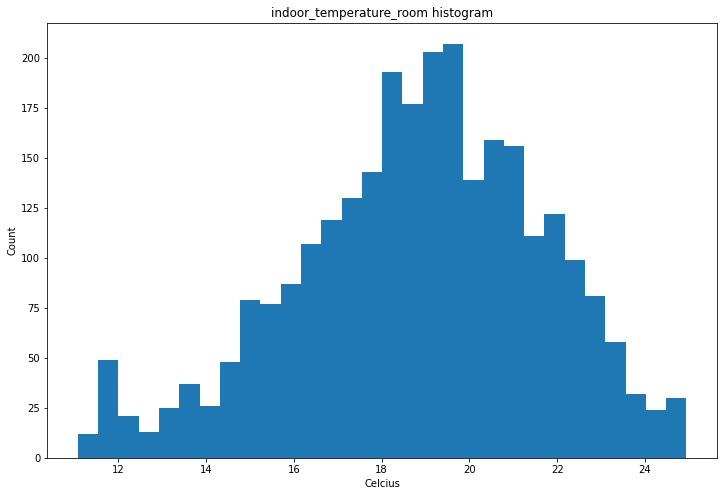

In [35]:
# Looks good
fig = plt.figure(figsize=(12, 8))
plt.hist(df['indoor_temperature_room'], bins = 30)
plt.ylabel('Count')
plt.xlabel('Celcius')
plt.title('indoor_temperature_room histogram')
plt.show()

## Section 4: "Signal" in Room Temperature over Time

Above we took a look at the relationship between each variable and the target variable both ordered in time and without respect to time. Now we look purely at the relationship between time and our target variable. 

When modeling time series data, at least if you plan to use any of the SARIMAX (Seasonal Auto Regressive Integrated Moving Average) family of models, it is important to make your data stationary. A stationary time series means three things: there is no trend, the variance is constant, and the autocorrelation is constant. For a non-stationary time series, mean, variance, and autocorrelation are changing over time, meaning there isn't one mathematical approximation function (model) that describes the system. 

**Trend** is the overall direction of the data. Is the mean of the data increasing or decreasing over time? Global CO2 concentration has a positive trend, as over the long run it is increasing overall even if there are month to month or year to year drops. The ARMA order components (p, d, q) of a SARIMAX model address trend.

**Seasonality** is the repeating cyclical patterns in a time series. The SARIMA order components (P, D, Q, S) of a SARIMAX model address the seasonality.

**Variance** is the distance between the data points and a zero line. 

**Autocorrelation** is the correlation coefficient of a time series with a lagged copy of itself. How well can you forecast based on values at previous dates? Autocorrelation coefficients of high magnitude mean that you can forecast the series from past data points.

### 4.1 Trend and Variance

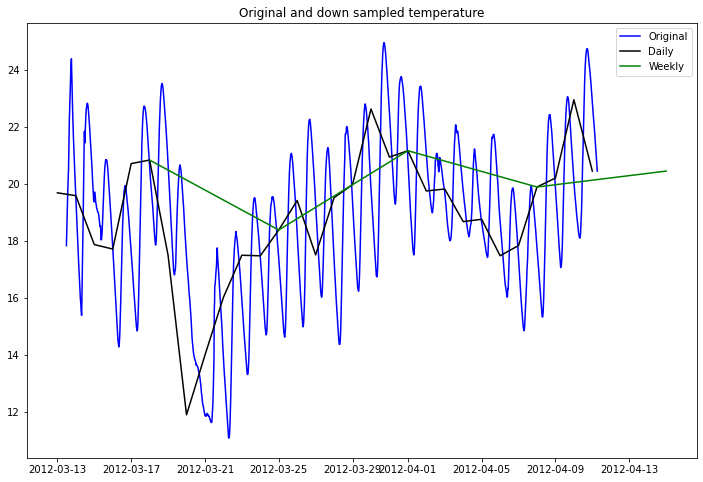

In [36]:
# View the room temperature series again resampled over a couple time periods
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(y, color='blue',label='Original')
daily = plt.plot(y.resample('D').last(), color='black', label = 'Daily')
weekly = plt.plot(y.resample('W').last(), color='green', label = 'Weekly')
plt.legend(loc='best')
plt.title('Original and down sampled temperature')
plt.show()

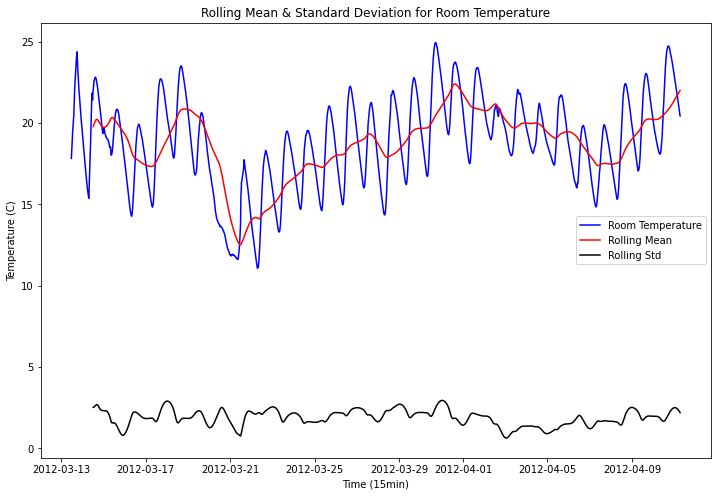

In [37]:
# View temperature data, its mean, and its standard deviation over time
rolmean = y.rolling(window = 100).mean()
rolstd = y.rolling(window = 100).std()

fig = plt.figure(figsize=(12, 8))
orig = plt.plot(y, color='blue',label='Room Temperature')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Room Temperature')
plt.xlabel('Time (15min)')
plt.ylabel('Temperature (C)')
plt.show()

<Figure size 432x288 with 0 Axes>

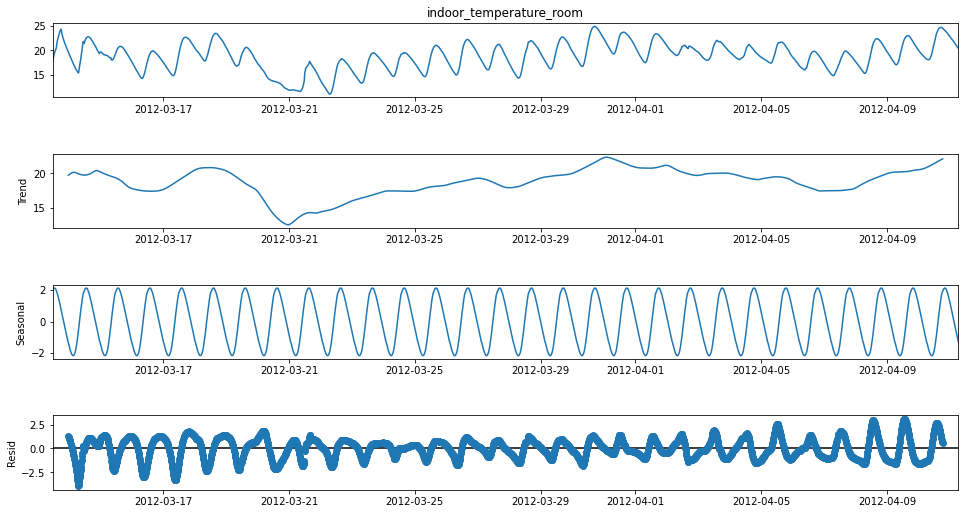

In [38]:
# View the seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate number of data points in each repeated cycle. A cycle we will define as one day
cycle = len(df.loc['2012-03-21 00:00:000': '2012-03-22 00:00:000'])

decomposition = seasonal_decompose(y, period = cycle)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

There doesn't seem to be much of a trend or change in the variance. Since the data has no trend and a constant variance to begin with, our ARMA orders will probably be zeros. The data clearly does have a very strong seasonality component to it, meaning our SARIMA orders will require investigation.

To check our intuitions about the shape of the trend line we run the augmented dickey-fuller test which tests for trend non-stationarity. The adf test assumes a null hypothesis that the time series is non-stationary as far as *trend* is concerned. If the p-value of the returned test statistic is below our significance threshold (0.05), then we reject the null hypothesis and assume, at least as far as trend is concerned, our data is stationary.

In [39]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test:
results = adfuller(y)
print(results)
print('The p-value of the augmented Dickey-Fuller test is', results[1])

(-5.750769516627781, 5.973892846388229e-07, 14, 2749, {'1%': -3.432731017363268, '5%': -2.862591962711835, '10%': -2.567329993388912}, -9068.301983064257)
The p-value of the augmented Dickey-Fuller test is 5.973892846388229e-07


The p-value of the adfuller test is very small, and quite a bit less than the standard 0.05 significance level. This is enough for us to reject the null hypothesis that an adfuller test presumes: that the time series is non stationary with respect to trend. Therefore, the time series is stationary with respect to a trend.

### 4.2 Autocorrelation

In [40]:
# Define function to test autocorrelation, first difference autocorr, and %change autocorr over different resampled periods
def auto_corr_resampler(y):
    
    periods = {'hourly': 'H', 'daily': 'D', 'weekly': 'W'}
    
    # Non-resampled autocorr
    autocorrelation = y.autocorr()
    diff_autocorrelation = y.diff().dropna().autocorr() 
    pct_change_autocorrelation = y.pct_change().autocorr()
    
    print('The autocorrelation is %4.2f' %(autocorrelation))
    print('The first difference autocorrelation of room temperature is %4.2f' %(diff_autocorrelation))
    print('The percent change autocorrelation is %4.2f' %(pct_change_autocorrelation), '\n')
    
    # Repeat the above at hourly, daily, and weekly downsamples
    for period in periods.keys():
        new_rate = y.resample(rule = periods[period]).last()
        autocorrelation = new_rate.autocorr()
        diff_autocorrelation = new_rate.diff().dropna().autocorr()
        pct_change_autocorrelation = new_rate.pct_change().dropna().autocorr()
        print('The autocorrelation of', period, 'is %4.2f' %(autocorrelation))
        print('The first difference autocorrelation of', period, 'is %4.2f' %(diff_autocorrelation))
        print('The percent change autocorrelation of', period, 'is %4.2f' %(pct_change_autocorrelation), '\n')

In [41]:
auto_corr_resampler(y)

The autocorrelation is 1.00
The first difference autocorrelation of room temperature is 0.94
The percent change autocorrelation is 0.93 

The autocorrelation of hourly is 0.98
The first difference autocorrelation of hourly is 0.89
The percent change autocorrelation of hourly is 0.88 

The autocorrelation of daily is 0.64
The first difference autocorrelation of daily is 0.01
The percent change autocorrelation of daily is 0.00 

The autocorrelation of weekly is -0.77
The first difference autocorrelation of weekly is -0.93
The percent change autocorrelation of weekly is -0.92 



Above we looked at the autocorrelation values, both for absolute differences and percent changes, at different resampled periods. It is important to note that these were all lag one autocorrelations, meaning the differences and percent changes were created from data at time k and data and time k - 1 period. 

Autocorrelation is quite high (1.00, 0.94 and 0.93) for data at the original periods (each set of measurements taken 15 minutes apart). The hourly autocorrelation is a bit lower than the original autocorrelation (0.98, 0.89 and 0.88), which isn't surprising given that the original data's periods were only 1/4 of an hour. Autocorrelation is low to virtually nonexistent for the data resampled into daily bins (0.64, 0.01 and 0.00), and quite high albeit negative (-0.77, -0.93 and -0.92) for weekly resampled data. We'll visualize this below.

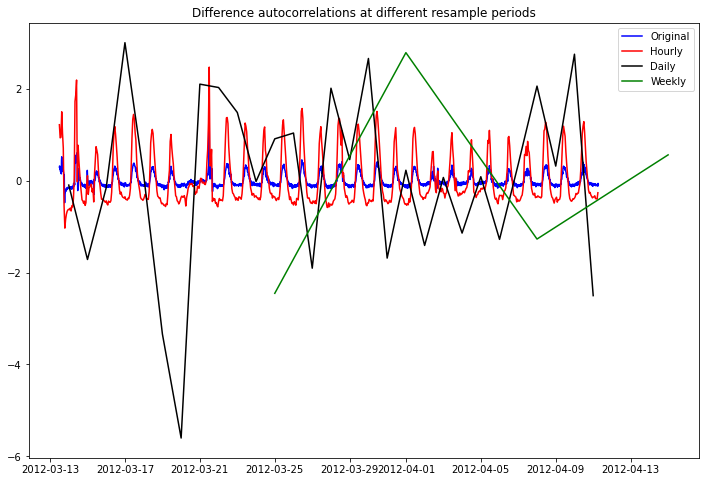

In [42]:
# Difference autocorrelations at different resample periods
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(y.diff().dropna(), color='blue',label='Original')
hourly = plt.plot(y.resample(rule = 'H').last().diff().dropna(), color='red', label='Hourly')
daily = plt.plot(y.resample(rule = 'D').last().diff().dropna(), color='black', label='Daily')
weekly = plt.plot(y.resample(rule = 'W').last().diff().dropna(), color='green', label='Weekly')
plt.legend(loc='best')
plt.title('Difference autocorrelations at different resample periods')
plt.show()

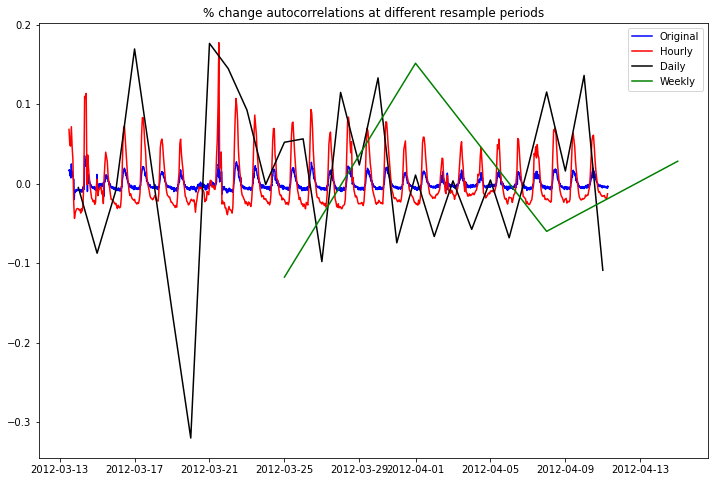

In [43]:
# Percent change autocorrelations at different resample periods
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(y.pct_change().dropna(), color='blue',label='Original')
hourly = plt.plot(y.resample(rule = 'H').last().pct_change().dropna(), color='red', label='Hourly')
daily = plt.plot(y.resample(rule = 'D').last().pct_change().dropna(), color='black', label='Daily')
weekly = plt.plot(y.resample(rule = 'W').last().pct_change().dropna(), color='green', label='Weekly')
plt.legend(loc='best')
plt.title('% change autocorrelations at different resample periods')
plt.show()

The weekly resampled data loses us far too much information to consider modeling it. The daily resampled data decently resembles a random walk, meaning data points are poorly correlated with previous data points. Hourly resampled data is still autocorrelated, and not much worse than the original series. However, we have have far too little data to consider training a model on resampled data.

Next we'll look at the autocorrelation and partial autocorrelation *functions* of the time series, which will show us the autocorrelations of the room temperature at different time lags. This is similar to what we've just done, only we're looking at the data without downsampling and seeing how the autocorrelation coefficient changes at lags beyond just lag one.

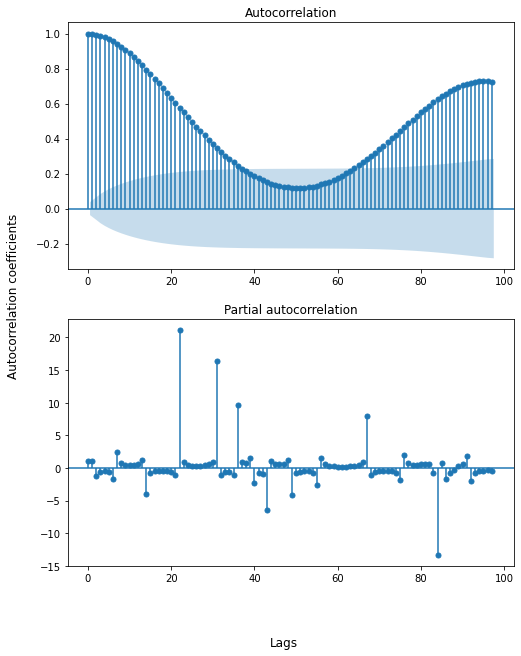

In [44]:
# Plot the acf and pacf of the room temeprature series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(2,1,figsize=(8,10))

# Our seasonality is the number we determined earlier from the number of data points in a cycle
acf = plot_acf(y, lags=cycle, ax=axes[0])
pacf = plot_pacf(y, lags=cycle, ax=axes[1])

axes[0].title.set_text('Autocorrelation')
axes[1].title.set_text('Partial autocorrelation')

fig.supxlabel('Lags')
fig.supylabel('Autocorrelation coefficients')

plt.show()

The shaded portion of these acf/pacf functions represent a significance threshold of 0.05. Lag periods with regression coefficients within that confidence interval have a 95%+ chance of truly lacking autocorrelation. An acf plot that shows many gradually decreasing significant autocorrelations and a pacf plot with no clear pattern is characteristic of a non-stationary data set. By the adfuller test our data is stationary as far as trend is concerned, but it seems it is still non-stationary due to other features. This is likely the seasonality, which we'll view in a moment.

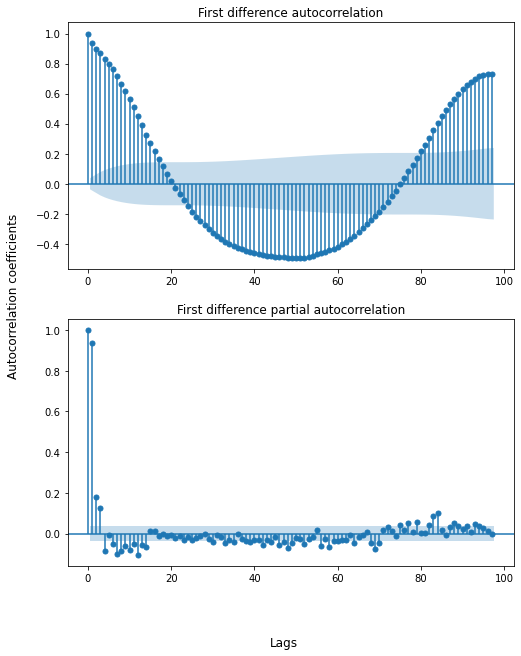

In [45]:
# Plot the acf and pacf of the first differenced room temeprature series
fig, axes = plt.subplots(2,1,figsize=(8,10))

first_diff_acf = plot_acf(y.diff().dropna(), lags=cycle, ax=axes[0])
first_diff_pacf = plot_pacf(y.diff().dropna(), lags=cycle, ax=axes[1])

axes[0].title.set_text('First difference autocorrelation')
axes[1].title.set_text('First difference partial autocorrelation')

fig.supxlabel('Lags')
fig.supylabel('Autocorrelation coefficients')

plt.show()

These plots of the first difference look a lot closer to an indication of stationarity. The acf plot trails off, but the pacf plot indicates stationarity after 4, or perhaps 14, lags since that is when the autocorrelation coefficients drop down to a level not significantly different than zero. This suggests appropriate that an AR(4) or AR(14) model might be appropriate, but the seasonal autocorrelation functions will most likley be clearer.

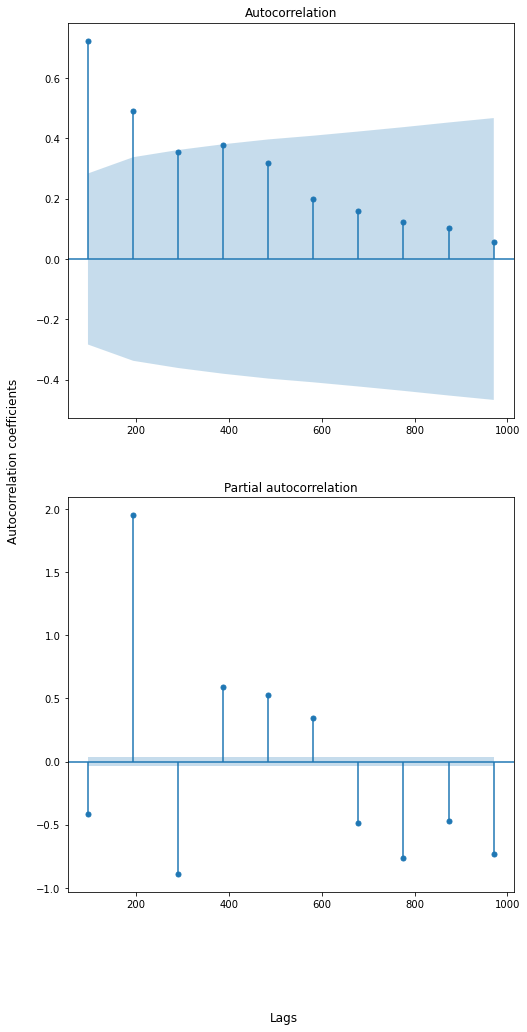

In [46]:
# Plot the seasonal acf and pacf
fig, axes = plt.subplots(2,1,figsize=(8,16))

# In a seasonal acf/pacf, pass in a list of cycles for the lags
ten_cycles = [cycle * x for x in range(1, 11)]

acf = plot_acf(y, lags=ten_cycles, ax=axes[0])
pacf = plot_pacf(y, lags=ten_cycles, ax=axes[1])

axes[0].title.set_text('Autocorrelation')
axes[1].title.set_text('Partial autocorrelation')

fig.supxlabel('Lags')
fig.supylabel('Autocorrelation coefficients')

plt.show()

The seasonal acf plot tails off which would normally suggest a SARIMAX(order = (0, 0, 0), seasonal_order = (p, 0, 0)) model, or a SARIMAX(order = (0, 0, 0), seasonal_order = (P, 0, Q)) model, but the seasonal pacf is a little inconclusive. Next we'll take a look at the seasonal first difference acf and pacf plots.

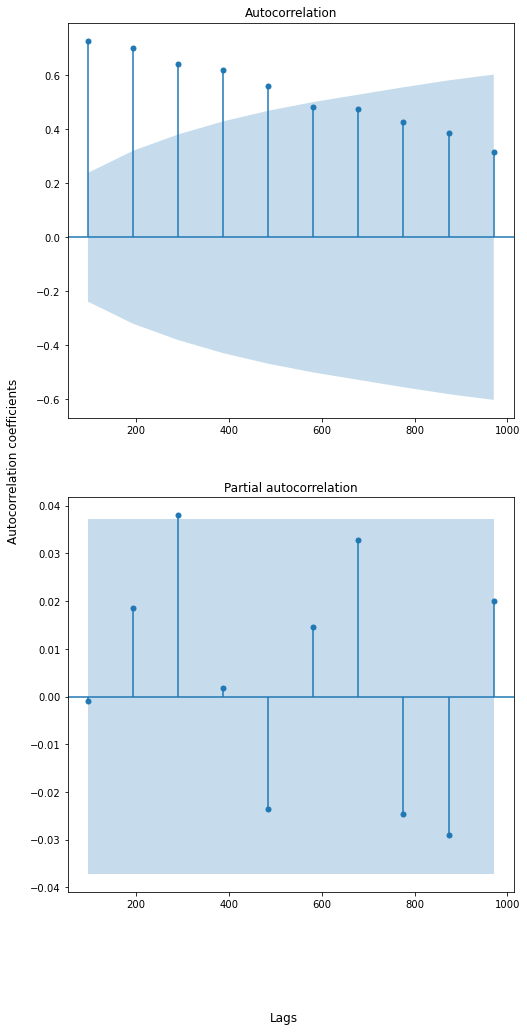

In [47]:
# Plot the seasonal acf and pacf
fig, axes = plt.subplots(2,1,figsize=(8,16))

# In a seasonal acf/pacf, pass in a list of cycles for the lags
ten_cycles = [cycle * x for x in range(1, 11)]

acf = plot_acf(y.diff().dropna(), lags=ten_cycles, ax=axes[0])
pacf = plot_pacf(y.diff().dropna(), lags=ten_cycles, ax=axes[1])

axes[0].title.set_text('Autocorrelation')
axes[1].title.set_text('Partial autocorrelation')

fig.supxlabel('Lags')
fig.supylabel('Autocorrelation coefficients')

plt.show()

The seasonal pacf plot here is also a little inconclusive here. It neither tails off nor drops off after a particular lag. Our best guess as to the appropriate model is SARIMAX(order = (0, 0, 0), seasonal_order = (p, 0, 0)) model, or a SARIMAX(order = (0, 1, 0), seasonal_order = (P, 0, Q)) model.

We'll also look at the first difference and seasonal difference acf and pacf plots.

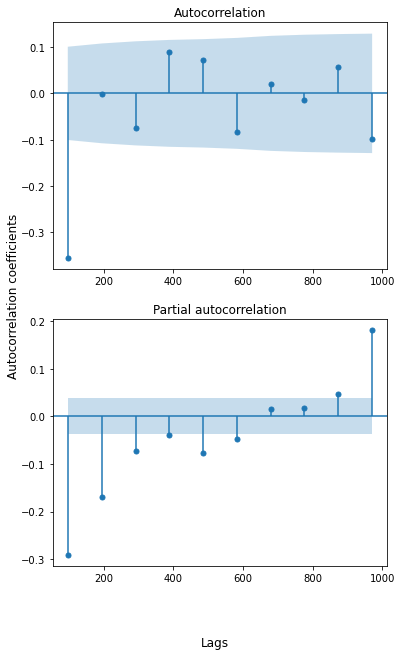

In [48]:
# Plot the seasonal acf and pacf
fig, axes = plt.subplots(2,1,figsize=(6,10))

# In a seasonal acf/pacf, pass in a list of cycles for the lags
ten_cycles = [cycle * x for x in range(1, 11)]

acf = plot_acf(y.diff().diff(cycle).dropna(), lags=ten_cycles, ax=axes[0])
pacf = plot_pacf(y.diff().diff(cycle).dropna(), lags=ten_cycles, ax=axes[1])

axes[0].title.set_text('Autocorrelation')
axes[1].title.set_text('Partial autocorrelation')

fig.supxlabel('Lags')
fig.supylabel('Autocorrelation coefficients')

plt.show()

Of all the acf and pacf plots, this one looks the most promising. The acf plot shows a sharp drop in autocorrelation after the first lag, and the pacf plot shows a trailing off. Therefore, appropriate SARIMAX model orders are probably SARIMAX(order = (0, 1, 0), seasonal_order = (0, 1, 1, 97))

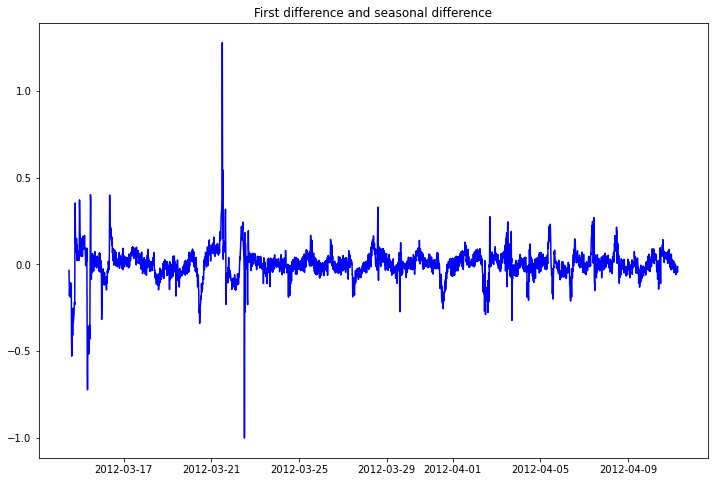

In [49]:
# View the time series at the order/seasonal order that caught our eye from the acf/pacf plots
fig = plt.figure(figsize=(12, 8))
first_diff_seasonal_diff = plt.plot(y.diff().diff(cycle).dropna(), color='blue')
plt.title('First difference and seasonal difference')
plt.show()

Now that is looking like uncorrelated white noise!

As a final check we'll look at the KPSS test. The KPSS test tests the null hypothesis that a time series is stationary. Therefore, if the test returns a p-value less than 0.05, we can reject the null hypothesis and assume that the data is non-stationary. Because we've observed strong seasonality and autocorrelation above, we expect to see a p-value less than 0.05 from the KPSS test.

In [50]:
from statsmodels.tsa.stattools import kpss

import warnings
warnings.filterwarnings('ignore')

stationarity = kpss(y, nlags = 'auto', regression = 'c')
print('The p-value is', stationarity[1])

The p-value is 0.01


As expected, the p-value is 0.01, which is less than 0.05. We reject the null hypothesis that the data is stationary, and thus conclude that the data is non-stationary. This confirms our assumptions from the acf/pacf plots. 

We'd like the data to be stationary. Let's see the KPSS test again for the first difference and seasonal difference chained together.

In [51]:
stationarity = kpss(y.diff().diff(cycle).dropna(), nlags = 'auto', regression = 'c')
print('The p-value at difference 1 is', stationarity[1])

The p-value at difference 1 is 0.1


The p-value is 0.1, which is greater than 0.05, and enough for us to reject the alternative hypothesis that the data is non-stationary. Thus, the data is stationary with our differencing choices.

# Section 5: Concluding Remarks

Moving forward we think of the data set as having two sets of explanatory variables:

1) The features of the data set besides indoor_temperature_room

2) Time

We're aiming to model both sets of variables to predict indoor_temperature_room seperately. This is accomplishable with a SARIMAX model. As far as the first category of explanatory variables is concerned, we found no great correlation between any feature and the room temperature. We also see widely varying scales of the features, with columns like sun_light_in_south_facade centered around a value of ~3000, and columns like rain centered around a value of ~0. Some scaling is in order. We also might consider dropping some outliers in the CO2 columns, and redefining the rain and sun dusk columns into narrower categories.

As far as the second category of explanatory variables (time) is concerned, the time series of the room temperature is not stationary. While it does not have a clear trend, it does have strong seasonality. Our acf and pacf plots showed us that differencing the data certainly helps remove some of the autocorrelation, but even better than that is taking the first difference AND the first seasonal difference. We determined that one "season" of our data is one day, since this is the cycle of temperature falling at night and rising again during they day. We selected a full twenty four hour period for a cycle, which contained about 100 measurements. The acf and pacf plots of this multi differenced data set showed that the SARIMAX model we'll likely use down the line is probably optimally of order 0, 1, 0 and seasonal order 0, 1, 1, 97. Plotting the multidifferenced time series and running the KPSS test on it revealed that those transformations were enough to achieve stationarity. 